In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.eda import eda as e
from src.missingness import check_missingness as cm

In [111]:
df= pd.read_csv('data/news.csv')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35680 entries, 0 to 35679
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         35680 non-null  int64  
 1   URL                        35680 non-null  object 
 2   timedelta                  35680 non-null  float64
 3   weekday                    35680 non-null  object 
 4   shares                     35680 non-null  int64  
 5   n_tokens_title             35680 non-null  float64
 6   n_tokens_content           35680 non-null  float64
 7   n_unique_tokens            35680 non-null  float64
 8   n_non_stop_words           35680 non-null  float64
 9   n_non_stop_unique_tokens   35680 non-null  float64
 10  num_hrefs                  34959 non-null  float64
 11  num_self_hrefs             34959 non-null  float64
 12  num_imgs                   34261 non-null  float64
 13  num_videos                 18925 non-null  flo

In [113]:
df.describe().T

count           mean            std  min  \
ID                         35680.0   19823.468918   11452.292291  0.0   
timedelta                  35680.0     354.523234     214.301086  8.0   
shares                     35680.0    3402.054961   11934.878541  4.0   
n_tokens_title             35680.0      10.395432       2.114600  2.0   
n_tokens_content           35680.0     545.995123     469.550052  0.0   
n_unique_tokens            35680.0       0.530461       0.136935  0.0   
n_non_stop_words           35680.0       0.970263       0.169862  0.0   
n_non_stop_unique_tokens   35680.0       0.672738       0.153881  0.0   
num_hrefs                  34959.0      10.866358      11.260971  0.0   
num_self_hrefs             34959.0       3.282531       3.834065  0.0   
num_imgs                   34261.0       4.513003       8.259735  0.0   
num_videos                 18925.0       1.286446       4.148189  0.0   
n_comments                 35680.0      94.122001     476.050347  0.0   
average_token_length       35680.0       4.547799       0.843522  0.0   
self_reference_min_shares  34959.0    4026.946198   20110.819102  0.0   
self_reference_max_shares  34959.0   10308.613255   40998.053595  0.0   
self_reference_avg_shares  34959.0    6424.933389   24588.092091  0.0   
num_keywords               35680.0       7.220095       1.909604  1.0   
kw_min_min                 35680.0      26.169703      69.705812 -1.0   
kw_max_min                 35680.0    1142.296851    3844.829034  0.0   
kw_avg_min                 35680.0     310.297441     616.961660 -1.0   
kw_min_max                 35680.0   13533.498851   57623.779316  0.0   
kw_max_max                 35680.0  752318.562220  214391.922961  0.0   
kw_avg_max                 35680.0  259143.787814  135080.424060  0.0   
kw_min_avg                 35680.0    1115.670961    1136.741358 -1.0   
kw_max_avg                 35680.0    5637.977838    6026.965362  0.0   
kw_avg_avg                 35680.0    3130.799667    1311.012948  0.0   

                                     25%            50%            75%  \
ID                           9890.750000   19801.500000   29788.250000   
timedelta                     163.000000     339.000000     543.000000   
shares                        946.000000    1400.000000    2800.000000   
n_tokens_title                  9.000000      10.000000      12.000000   
n_tokens_content              247.000000     410.000000     716.000000   
n_unique_tokens                 0.471030       0.539011       0.608203   
n_non_stop_words                1.000000       1.000000       1.000000   
n_non_stop_unique_tokens        0.625912       0.690323       0.754036   
num_hrefs                       4.000000       8.000000      14.000000   
num_self_hrefs                  1.000000       3.000000       4.000000   
num_imgs                        1.000000       1.000000       4.000000   
num_videos                      0.000000       0.000000       1.000000   
n_comments                      2.000000      16.000000      78.000000   
average_token_length            4.477958       4.663366       4.853695   
self_reference_min_shares     638.000000    1200.000000    2600.000000   
self_reference_max_shares    1100.000000    2800.000000    7900.000000   
self_reference_avg_shares     978.000000    2200.000000    5166.666667   
num_keywords                    6.000000       7.000000       9.000000   
kw_min_min                     -1.000000      -1.000000       4.000000   
kw_max_min                    445.000000     658.000000    1000.000000   
kw_avg_min                    141.440476     235.428571     357.000000   
kw_min_max                      0.000000    1400.000000    7800.000000   
kw_max_max                 843300.000000  843300.000000  843300.000000   
kw_avg_max                 172595.650000  244133.333333  330980.000000   
kw_min_avg                      0.000000    1020.667532    2058.093423   
kw_max_avg                   3559.646658    4348.584651    6

kw_min_min, kw_avg_min, and kw_min_avg have a value of -1 which is not possible so it's likely an error with data entry

In [114]:
df['kw_min_min'].value_counts()

kw_min_min
-1.0      20660
 4.0      10727
 217.0     4184
 0.0         75
 47.0         5
 57.0         4
 86.0         4
 82.0         3
 294.0        2
 88.0         2
 45.0         2
 63.0         2
 116.0        1
 377.0        1
 184.0        1
 138.0        1
 98.0         1
 41.0         1
 129.0        1
 162.0        1
 201.0        1
 80.0         1
Name: count, dtype: int64

In [115]:
print(df['kw_avg_min'].value_counts().sort_index())
print(f"Rows with kw_avg_min = -1: {len(df[df['kw_avg_min'] == -1])}")
print(df['kw_min_avg'].value_counts().sort_index())
print(f"Rows with kw_min_avg = -1: {len(df[df['kw_min_avg'] == -1])}")

kw_avg_min
-1.000000        644
-0.857143          2
-0.800000          7
-0.750000         13
-0.741000          1
                ... 
 27123.000000      1
 29946.900000      1
 34855.125000      1
 39979.000000      1
 42827.857143      1
Name: count, Length: 15949, dtype: int64
Rows with kw_avg_min = -1: 644
kw_min_avg
-1.000000           6
 0.000000       15396
 41.000000          3
 47.000000          1
 82.000000          1
                ...  
 3602.624555        1
 3607.114624        3
 3608.693473        1
 3609.718376        2
 3610.124972        2
Name: count, Length: 14686, dtype: int64
Rows with kw_min_avg = -1: 6


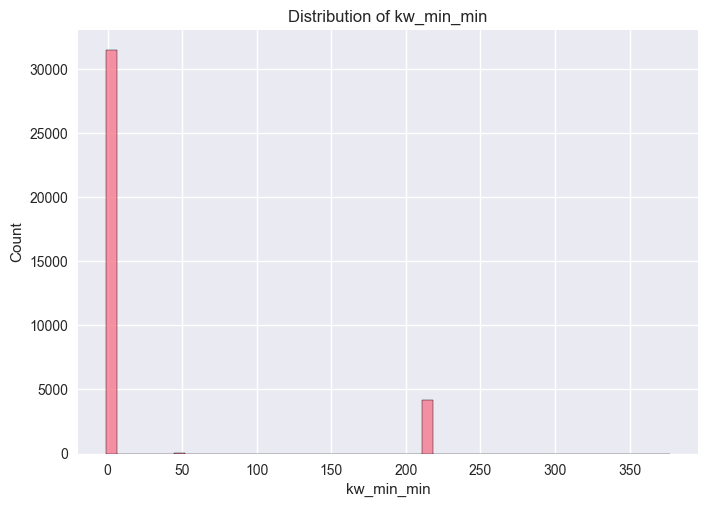

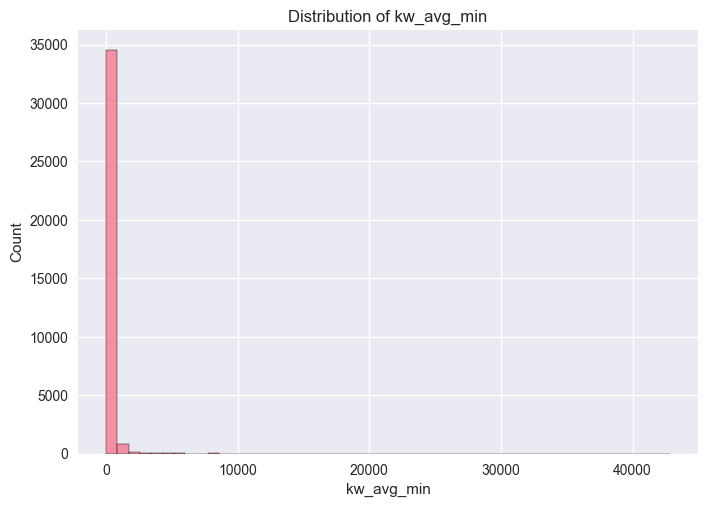

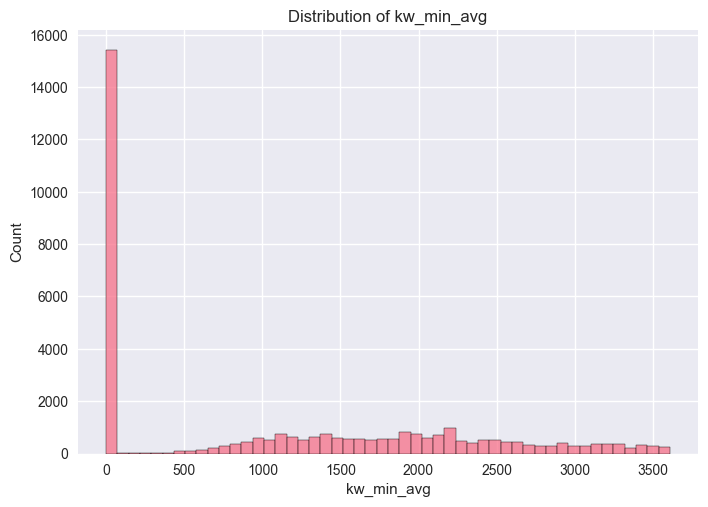

In [116]:
for col in ['kw_min_min', 'kw_avg_min', 'kw_min_avg']:
    sns.histplot(df[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [117]:
df_neg = df[df['kw_min_min'] == -1][['shares', 'num_keywords', 'n_comments', 'kw_max_min', 'kw_avg_min', 'kw_min_avg']]
print(df_neg.describe())

              shares  num_keywords    n_comments     kw_max_min    kw_avg_min  \
count   20660.000000  20660.000000  20660.000000   20660.000000  20660.000000   
mean     3379.295789      7.154259     94.203291    1050.933913    251.354895   
std      9620.112064      1.910979    345.345855    3174.375027    537.825997   
min         5.000000      1.000000      0.000000       0.000000     -1.000000   
25%       959.000000      6.000000      2.000000     437.000000    114.333333   
50%      1400.000000      7.000000     17.000000     646.000000    189.213571   
75%      2700.000000      9.000000     79.000000     945.000000    281.578571   
max    663600.000000     10.000000  12280.000000  158900.000000  39979.000000   

         kw_min_avg  
count  20660.000000  
mean    1253.905101  
std     1161.272743  
min       -1.000000  
25%        0.000000  
50%     1213.916667  
75%     2177.469530  
max     3610.124972  


We will treat all negative (-1) as parsing error for “no shares” or invalid keyword data and replace them with 0

In [118]:
# Replace 'kw_min_min', 'kw_avg_min', 'kw_min_avg' negative values with 0
keyword_cols = ['kw_min_min', 'kw_avg_min', 'kw_min_avg']
for col in keyword_cols:
    df.loc[df[col] < 0, col] = 0

In [119]:
df.describe(include=['object']).T

count unique                                                top  \
URL           35680  35680  http://mashable.com/2013/01/07/amazon-instant-...   
weekday       35680      7                                          wednesday   
data_channel  30218      6                                              world   

              freq  
URL              1  
weekday       6663  
data_channel  7573

In [120]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates so nothing to drop

Besides 'weekday' and 'data_channel' all datatypes are numerical, we'll convert those categorical features to numerical representation for heatmaps etc, and check if ID has any correlation with shares before dropping it

In [121]:
# Check correlation between ID and shares
corr = df['ID'].corr(df['shares'])
print(f"Pearson correlation between ID and shares: {corr}")

Pearson correlation between ID and shares: -0.011849572583725694


In [122]:
from scipy.stats import spearmanr
spear_corr, p_value = spearmanr(df['ID'], df['shares'])
print(f"Spearman correlation: {spear_corr}, p-value: {p_value}")

Spearman correlation: -0.03546528274806362, p-value: 2.0704940804218604e-11


Since both Pearson and Spearman show no correlation, we can safetly drop ID

In [123]:
# Drop ID
df = df.drop(columns=['ID'])

Let's check if URL has any descriptive features such as data channel in the links before dropping it

In [124]:
df['URL'].head()

0    http://mashable.com/2013/01/07/amazon-instant-...
1    http://mashable.com/2013/01/07/ap-samsung-spon...
2    http://mashable.com/2013/01/07/apple-40-billio...
3    http://mashable.com/2013/01/07/astronaut-notre...
4     http://mashable.com/2013/01/07/att-u-verse-apps/
Name: URL, dtype: object

The URL doesn't have an identifier for data channel or anything else useful so let's drop it

In [125]:
# Drop URL
df = df.drop(columns=['URL'])

Now all features are numerical, let's explore the missing data

In [126]:
df['num_videos'].value_counts()

num_videos
0.0     11894
1.0      4511
2.0      1056
3.0       252
11.0      149
4.0       129
10.0      113
21.0      103
5.0        68
26.0       62
6.0        58
16.0       50
9.0        47
12.0       43
7.0        42
25.0       40
13.0       40
8.0        40
14.0       37
15.0       36
17.0       27
20.0       24
27.0       18
22.0       12
18.0       11
33.0        7
31.0        7
19.0        7
28.0        5
51.0        5
24.0        5
50.0        4
74.0        3
23.0        3
34.0        3
73.0        2
32.0        2
42.0        2
35.0        1
91.0        1
53.0        1
65.0        1
29.0        1
59.0        1
38.0        1
48.0        1
Name: count, dtype: int64

In [127]:
df['data_channel'].value_counts() 

data_channel
world            7573
technology       6642
entertainment    6407
business         5623
social_media     2089
lifestyle        1884
Name: count, dtype: int64

num_videos have 0, 1, 2 as the most frequent values, while data_channel is more spread out with 'social media' and 'lifestyle' being the least frequent 

Detected missing columns: ['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'data_channel', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_shares']
Detected complete columns (numeric): ['timedelta', 'shares', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'n_comments', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']


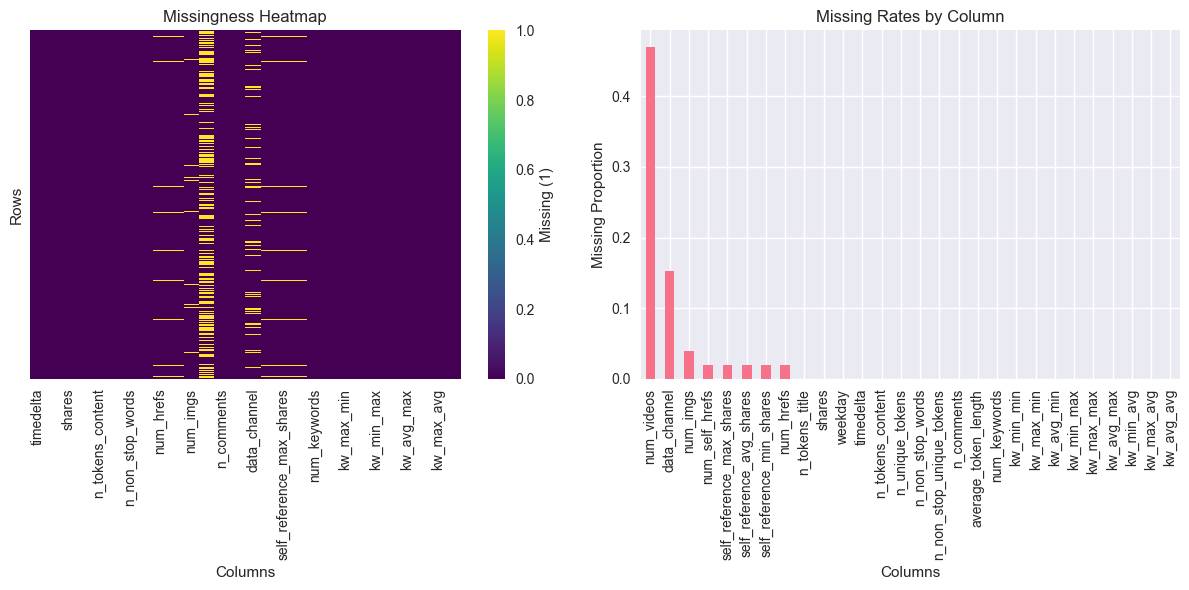


Missingness Analysis Results:

Column: num_hrefs
  Missing Rate: 0.020
  Overall Decision: Likely MAR
  Note: MNAR cannot be ruled out without domain knowledge; check distributions manually.
  Summary of Tests: 19 tests run, 2 indicate MAR
  All Decisions (with column names):
    - vs. timedelta: p=0.632, Independent (MCAR)
    - vs. shares: p=0.983, Independent (MCAR)
    - vs. n_tokens_title: p=0.501, Independent (MCAR)
    - vs. n_tokens_content: p=0.861, Independent (MCAR)
    - vs. n_unique_tokens: p=0.989, Independent (MCAR)
    - vs. n_non_stop_words: p=1.000, Independent (MCAR)
    - vs. n_non_stop_unique_tokens: p=0.922, Independent (MCAR)
    - vs. n_comments: p=8.83e-06, Dependent (MAR)
    - vs. average_token_length: p=0.590, Independent (MCAR)
    - vs. num_keywords: p=0.728, Independent (MCAR)
    - vs. kw_min_min: p=0.849, Independent (MCAR)
    - vs. kw_max_min: p=0.938, Independent (MCAR)
    - vs. kw_avg_min: p=0.978, Independent (MCAR)
    - vs. kw_min_max: p=0.629,

{'num_hrefs': {'missing_rate': np.float64(0.020207399103139012),
  'chi2_stats': [np.float64(2.5690302262537927),
   np.float64(0.3920678153764855),
   np.float64(3.3519421663451077),
   np.float64(1.3012712765516665),
   np.float64(0.3087282604617827),
   np.float64(0.0),
   np.float64(0.9145926341457127),
   np.float64(23.27559741265873),
   np.float64(1.9163252698728954),
   np.float64(2.039993547801223),
   np.float64(1.373113782931242),
   np.float64(0.4127145368285519),
   np.float64(0.45401145385710856),
   np.float64(2.5887346594186136),
   np.float64(11.028028911666096),
   np.float64(2.942611810345766),
   np.float64(1.0478286008487931),
   np.float64(0.31480281394120524),
   np.float64(1.5568364396800005)],
  'p_values': [np.float64(0.6323189682080057),
   np.float64(0.9831211692784146),
   np.float64(0.5007447709363755),
   np.float64(0.8611598037935673),
   np.float64(0.9892437917455872),
   np.float64(1.0),
   np.float64(0.9224579970612139),
   np.float64(8.82608773782704

In [128]:
cm(df)

- num_self_href, num_hrefs, self_reference_min_shares..etc have the same missing % which make sense since they all reference links within the article
- num_videos and data_channel, which have the highest % of missing data, don't seem to be clustered around any specific area, indicating they might be MAR or MCAR

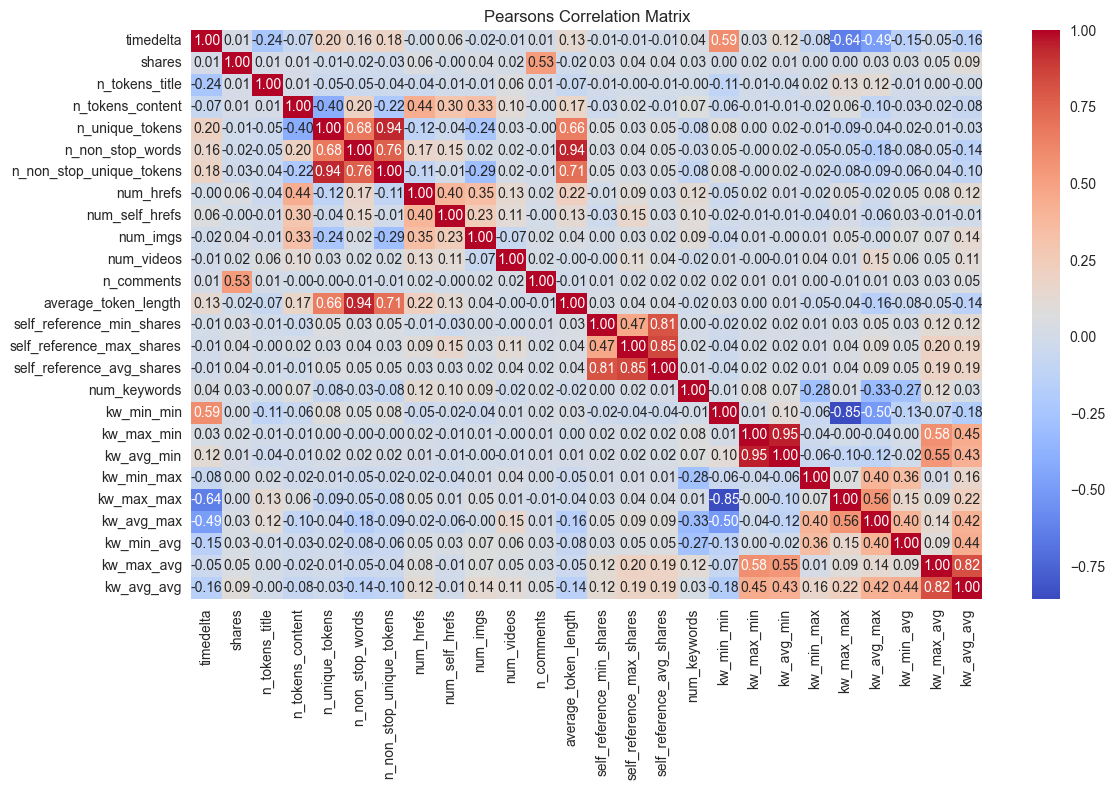

In [129]:
# Define numerical features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
e.pearson(df, num_features)

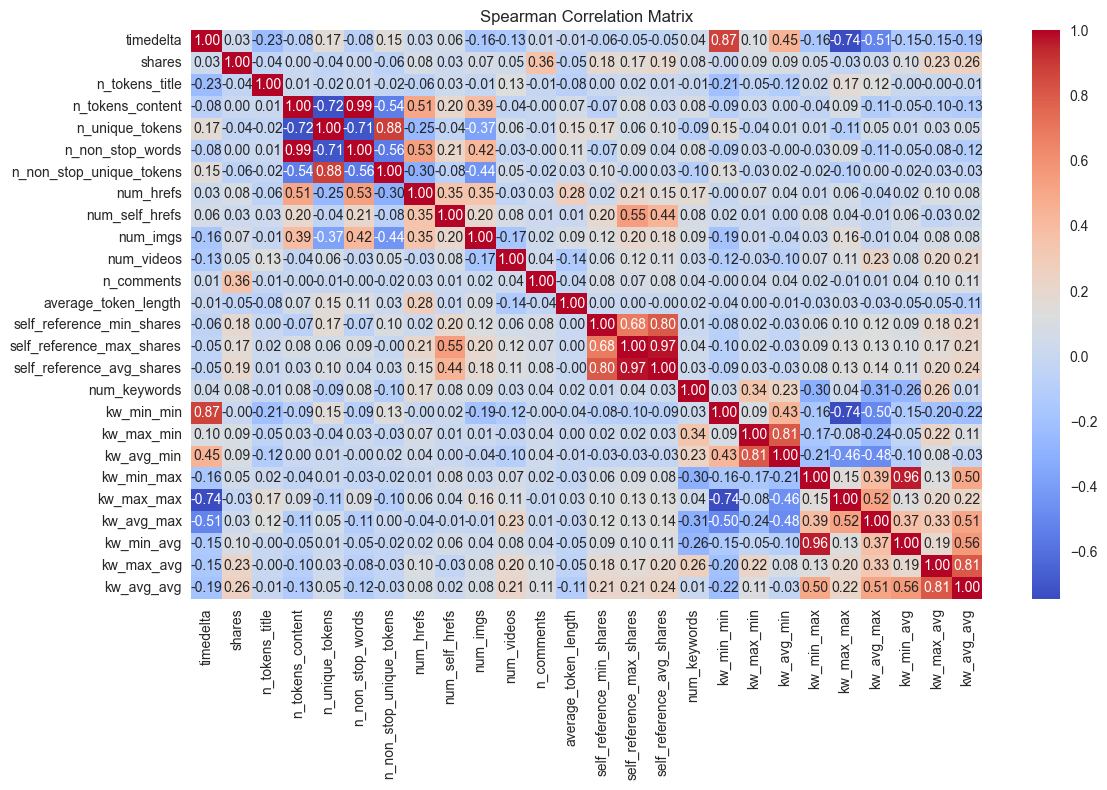

In [130]:
e.spearman(df, num_features)

For data_channel since it has low importance(0.008) like with num_videos, let's assign a new category 'Unknown' to preserves the categorical nature, and allows the model to learn if missingness itself is predictive, which is a simplier method to impute for this low importance feature and would still work well with tree-based models.

In [131]:
# Replace data_channel missing values with 'unknown'
df['data_channel'] = df['data_channel'].fillna('unknown')

Let's replace the weekday and data_channel categories with numerical representations so all our features are numeric so we can plot heatmaps/charts easier

In [132]:
df['data_channel'].value_counts()

data_channel
world            7573
technology       6642
entertainment    6407
business         5623
unknown          5462
social_media     2089
lifestyle        1884
Name: count, dtype: int64

In [133]:
# Replace weekday and data_channel categories with numerical representations
df['weekday'] = df['weekday'].map({'monday':1, 'tuesday':2, 'wednesday':3, 'thursday':4, 'friday':5, 'saturday':6, 'sunday':7})
df['data_channel'] = df['data_channel'].map({'lifestyle':1, 'entertainment':2, 'business':3, 'social_media':4, 'technology':5, 'world':6, 'unknown':7})

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df is preprocessed (categoricals encoded, e.g., one-hot for data_channel, weekday)
X = df.drop(['shares'], axis=1)  # Drop non-predictive cols
y = df['shares']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

n_comments                   0.505249
kw_avg_avg                   0.034911
self_reference_max_shares    0.034078
n_tokens_content             0.033256
kw_avg_max                   0.029751
n_non_stop_unique_tokens     0.028885
kw_avg_min                   0.028647
n_tokens_title               0.026597
kw_max_min                   0.025592
num_self_hrefs               0.025322
self_reference_avg_shares    0.025177
self_reference_min_shares    0.022165
average_token_length         0.021975
kw_max_avg                   0.021255
num_hrefs                    0.018940
num_imgs                     0.018850
n_unique_tokens              0.017537
timedelta                    0.014543
kw_min_max                   0.013416
weekday                      0.011690
num_videos                   0.010037
kw_min_avg                   0.009184
num_keywords                 0.009020
data_channel                 0.007051
kw_max_max                   0.004402
kw_min_min                   0.002294
n_non_stop_w

Since missing videos indicate missing dependen with n_non_stop_unique_tokens and kw_avg_max, articles with low n_non_stop_unique_tokens (less diverse content) might be text-only, and imputing 0 for num_videos and adding a missing indicator (is_missing_videos) captures both the absence of videos and the potential signal in missingness.

Imputing with 0 is unlikely to distort the data, as it’s a plausible value and doesn’t assume unrealistic patterns (unlike mean/median). Since shares is independent of num_videos missingness, imputation won’t introduce systematic bias.

Tree-based models (e.g., XGBoost, Random Forest) handle low-importance features well, and feature engineering (e.g., binning num_videos into 0 vs. >0) could uncover hidden value, we'll keep that in mind for future modeling and feature engineering

In [135]:
df['is_missing_videos'] = df['num_videos'].isnull().astype(int)
df['num_videos'] = df['num_videos'].fillna(0)

Since the missing rate for num_imgs in low(4%) and it's a fairly low importance feature(0.02), let's go with a simple imputation method of assuming missing values means no images, especially in text-heavy or low-budget articles and fill in the values with 0

In [136]:
df['num_imgs'] = df['num_imgs'].fillna(0)

For the remaining features num_hrefs, num_self_hrefs, self_reference_min_shares, self_reference_max_shares, and self_reference_avg_shares, which all have the same missing %(2) and about the same feature importance(~0.02), lets assume missing values mean no links or self-references and impute the missing values with 0 as well

In [137]:
link_cols = ['num_hrefs', 'num_self_hrefs', 
             'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_shares']
df[link_cols] = df[link_cols].fillna(0)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35680 entries, 0 to 35679
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timedelta                  35680 non-null  float64
 1   weekday                    35680 non-null  int64  
 2   shares                     35680 non-null  int64  
 3   n_tokens_title             35680 non-null  float64
 4   n_tokens_content           35680 non-null  float64
 5   n_unique_tokens            35680 non-null  float64
 6   n_non_stop_words           35680 non-null  float64
 7   n_non_stop_unique_tokens   35680 non-null  float64
 8   num_hrefs                  35680 non-null  float64
 9   num_self_hrefs             35680 non-null  float64
 10  num_imgs                   35680 non-null  float64
 11  num_videos                 35680 non-null  float64
 12  n_comments                 35680 non-null  float64
 13  average_token_length       35680 non-null  flo

In [139]:
df.columns

Index(['timedelta', 'weekday', 'shares', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'n_comments',
       'average_token_length', 'data_channel', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_shares',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'is_missing_videos'],
      dtype='object')

## Univariate Analysis

In [140]:
cont_features =['timedelta',  'shares', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'n_comments',
       'average_token_length',  'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_shares',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',]
cat_features = ['data_channel', 'weekday', 'is_missing_videos']

c:\Users\Admin\Downloads\news\src\eda.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, hue=hue, palette=palette)  # Use ax for easier manipulation


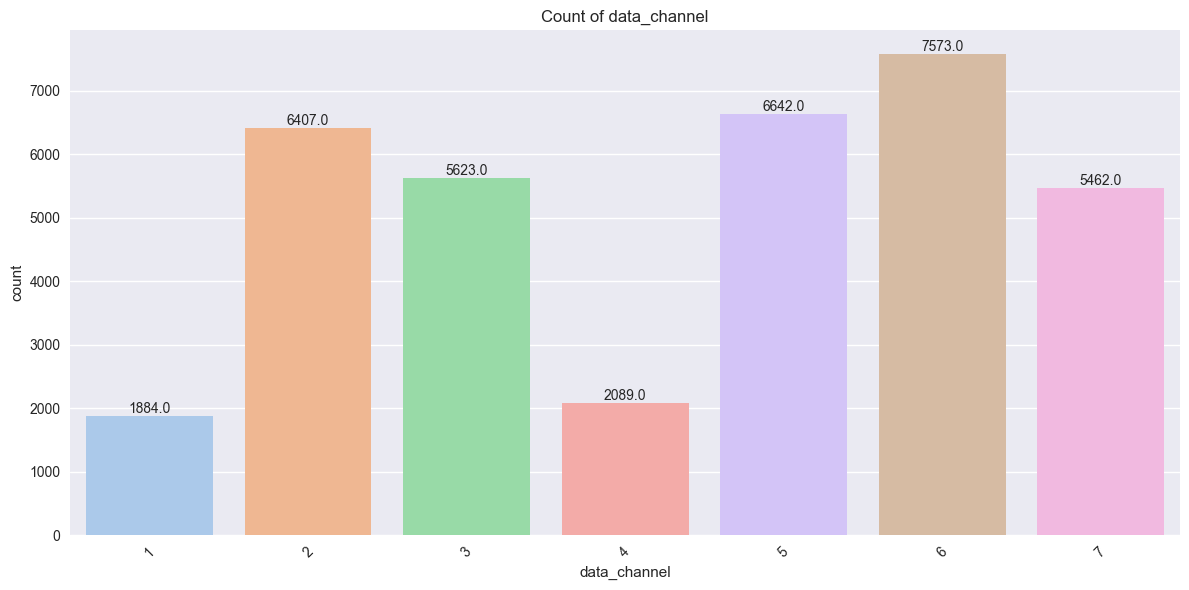

c:\Users\Admin\Downloads\news\src\eda.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, hue=hue, palette=palette)  # Use ax for easier manipulation


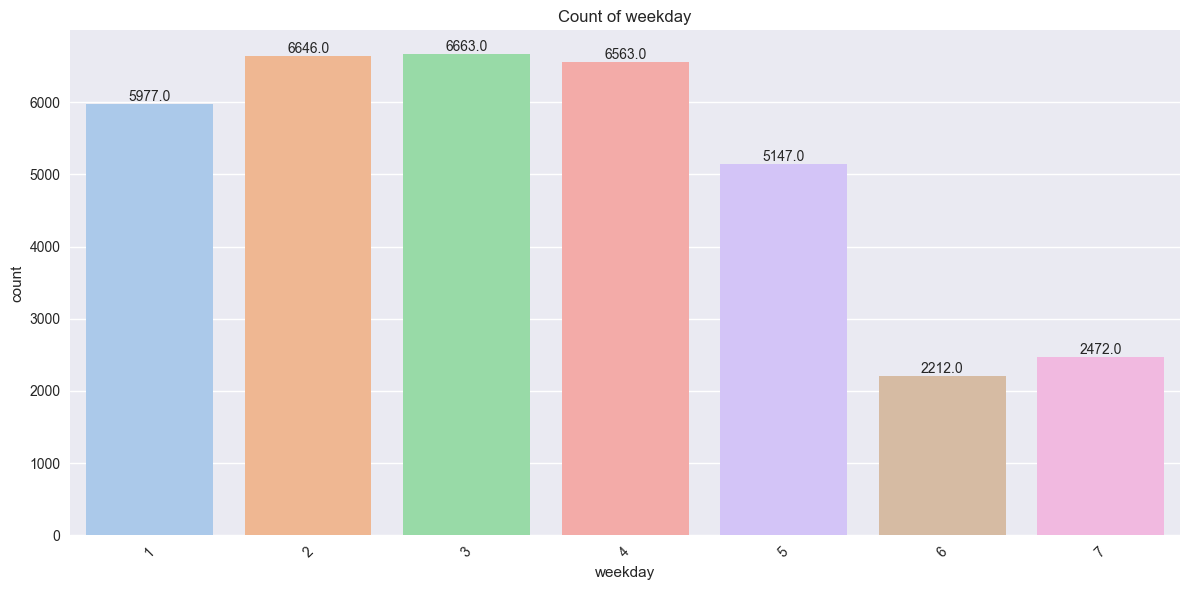

c:\Users\Admin\Downloads\news\src\eda.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, hue=hue, palette=palette)  # Use ax for easier manipulation


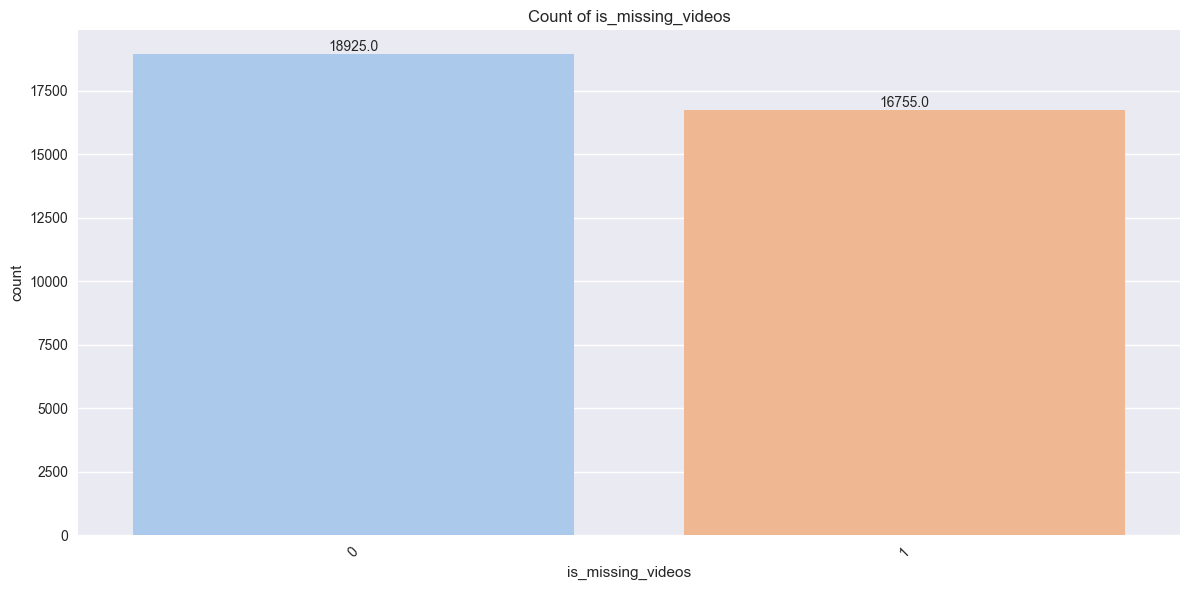

In [141]:
for features in cat_features:
    e.bar(df, features)

lifestyle and social media are the least frequent genres. There are less articles from the Friday-Monday period.

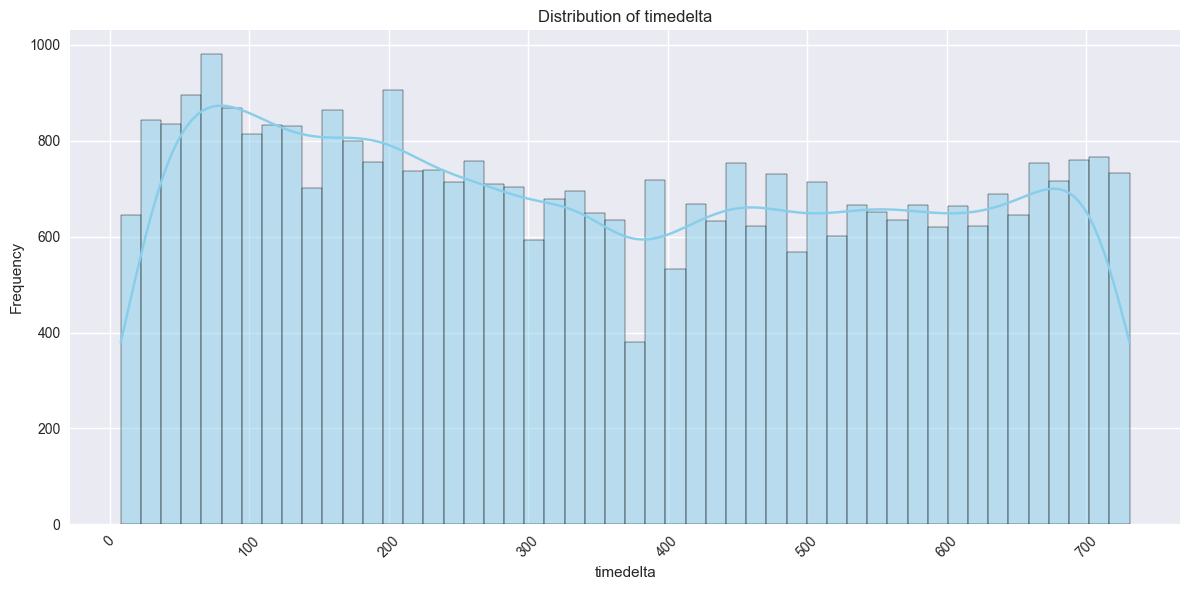

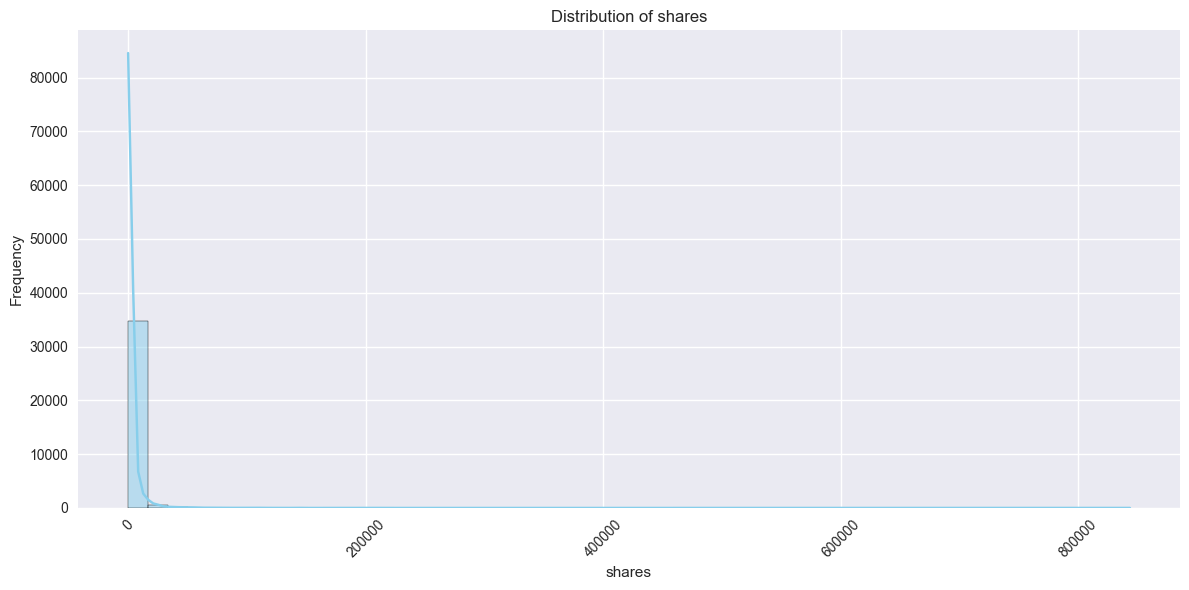

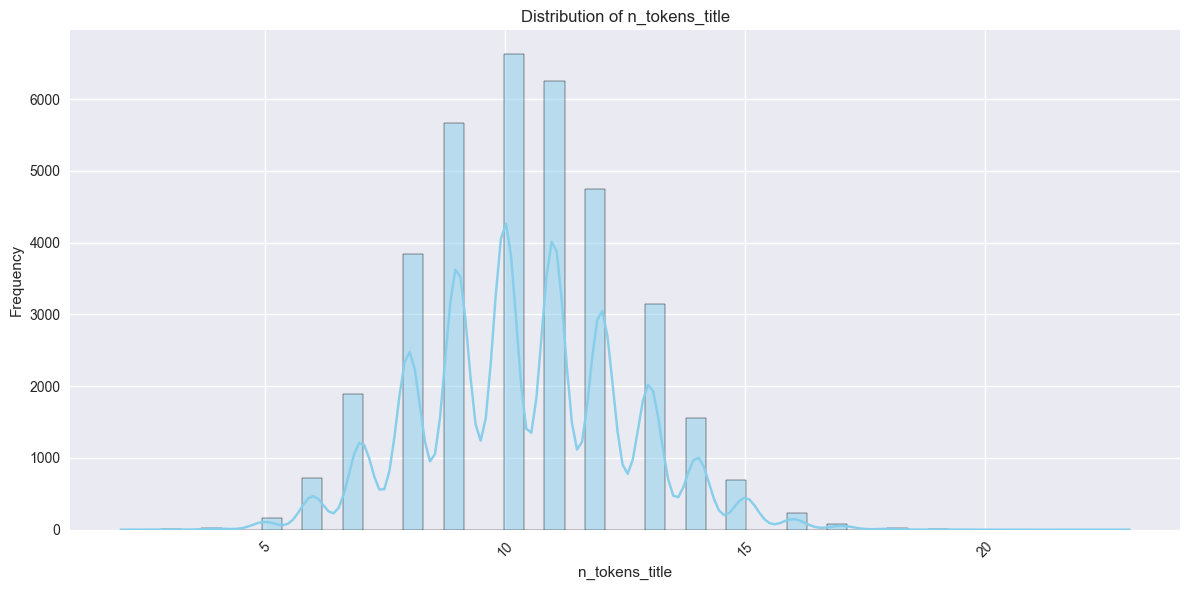

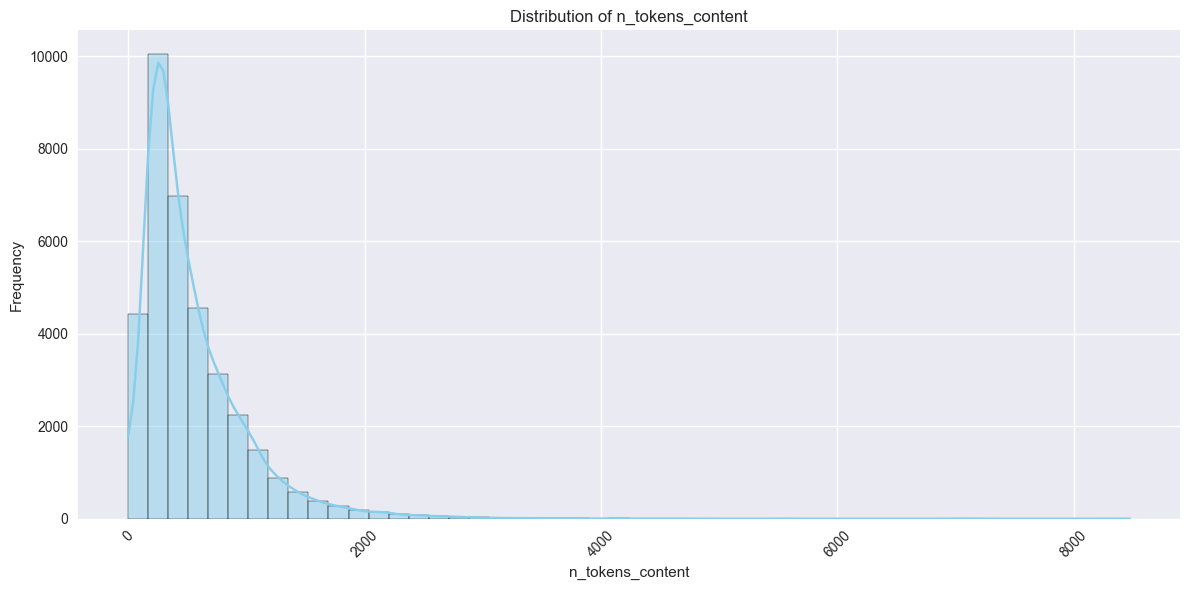

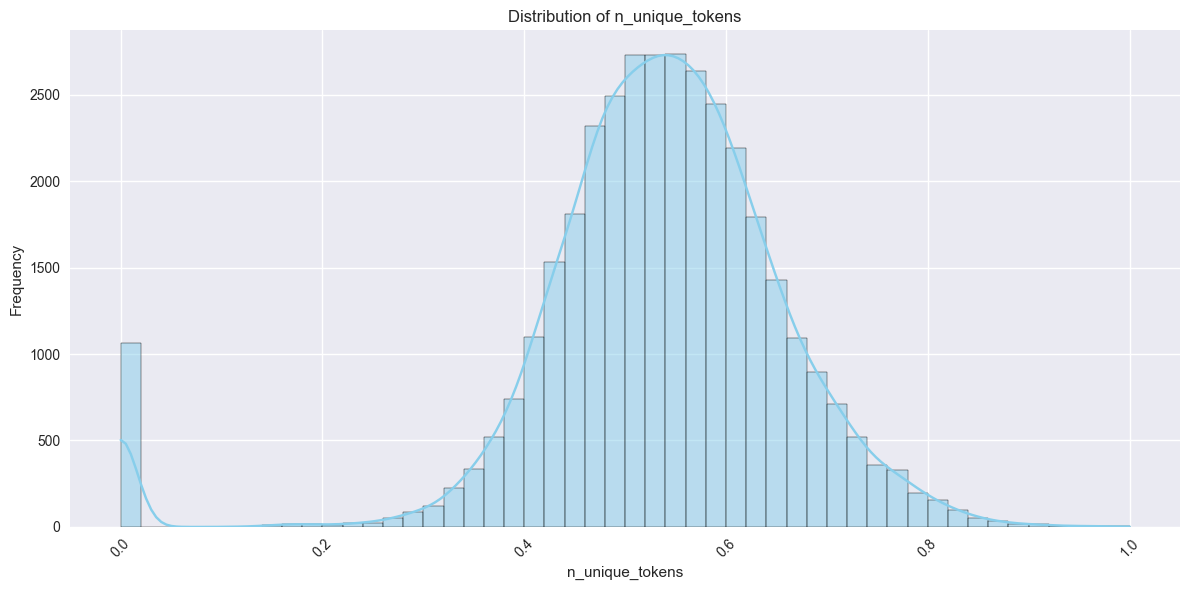

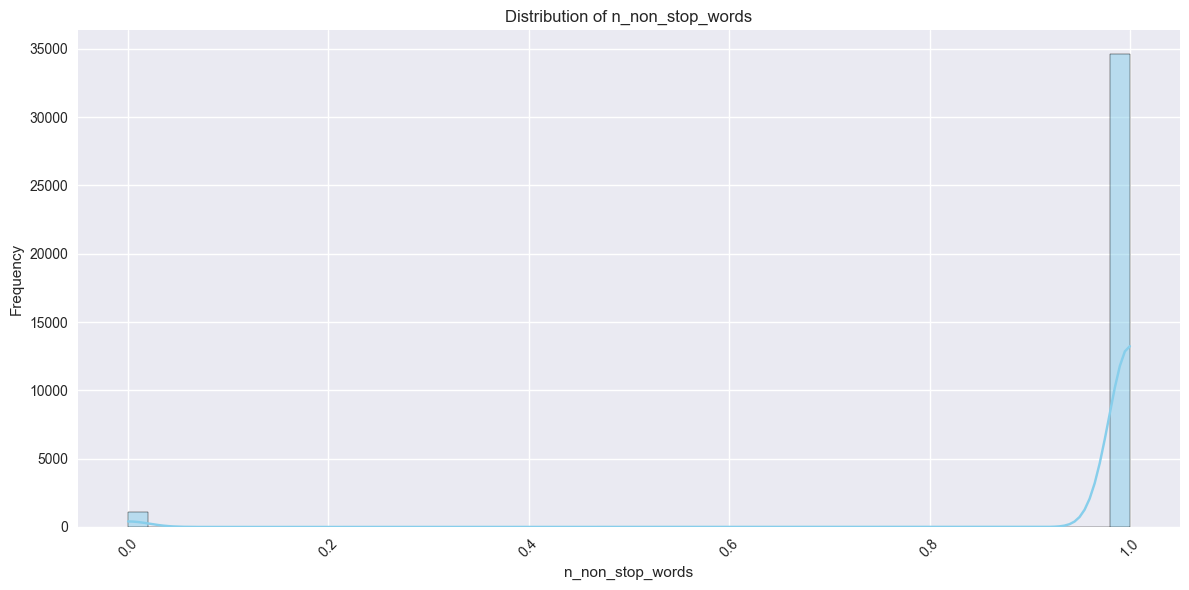

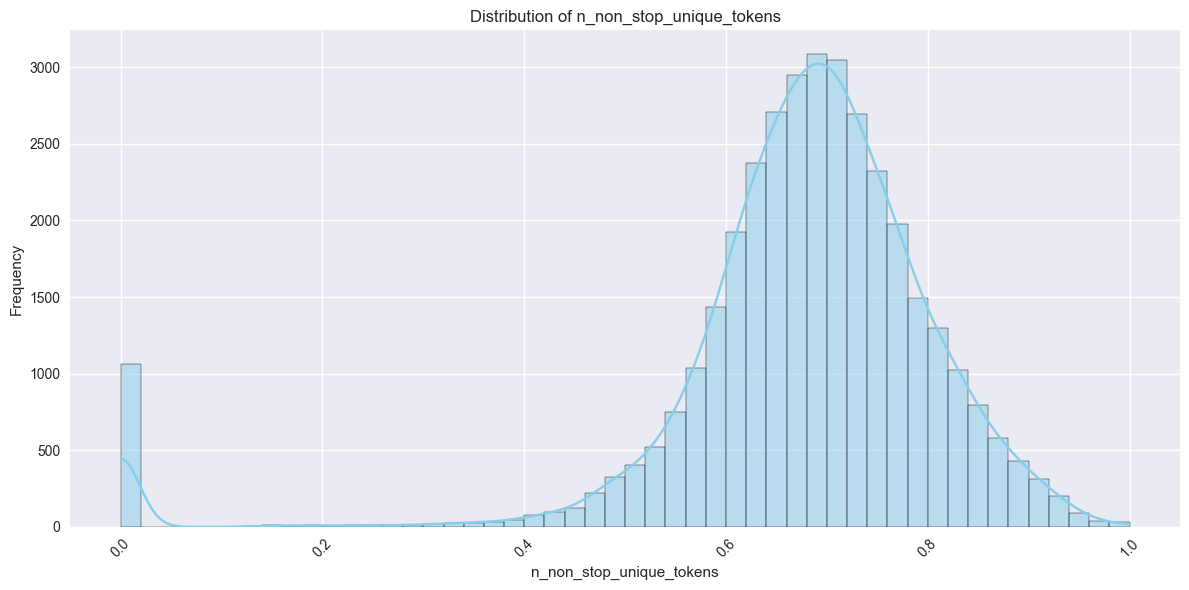

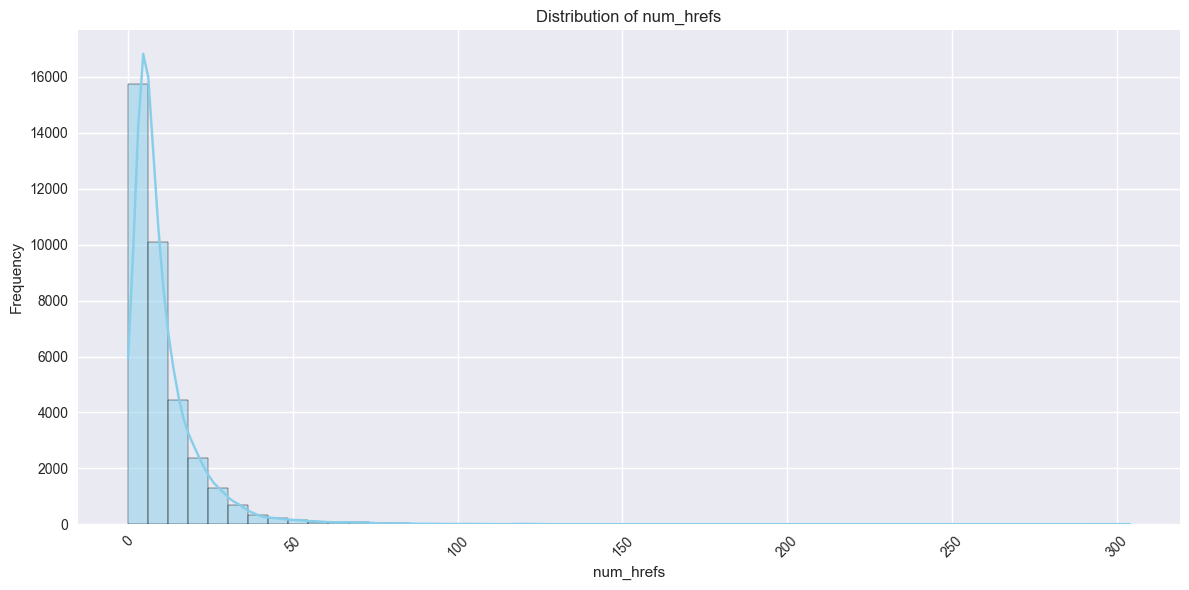

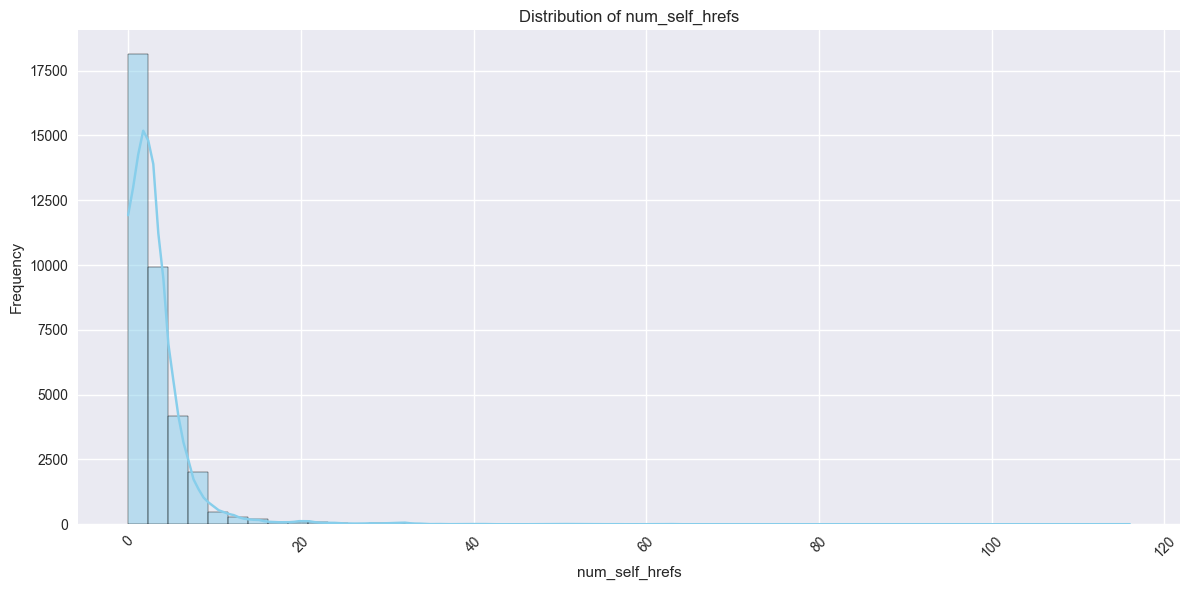

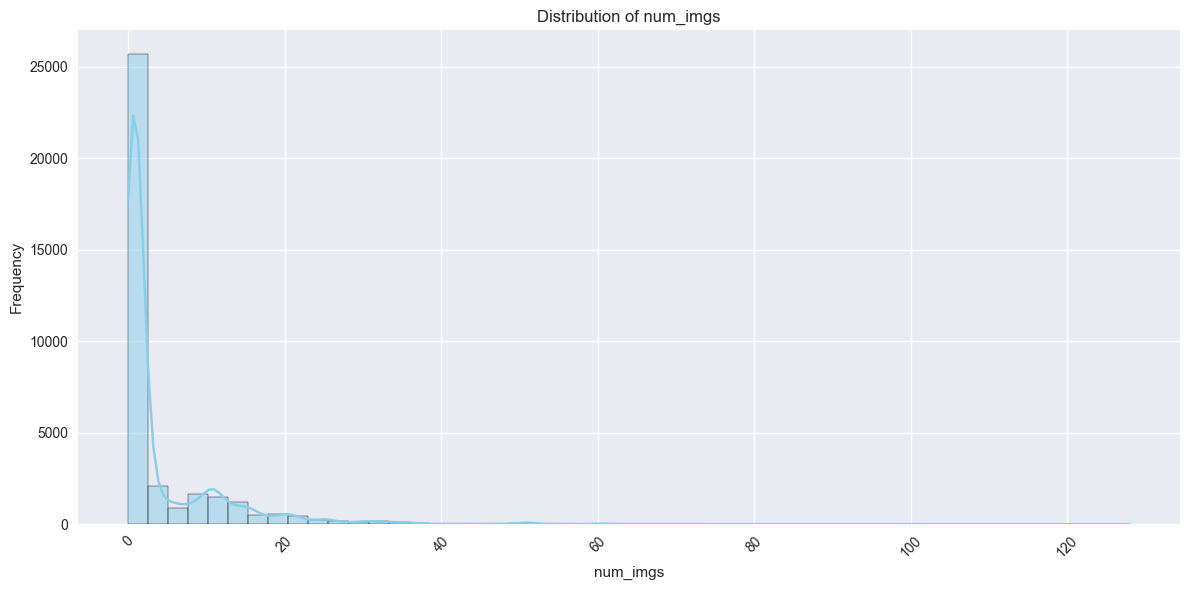

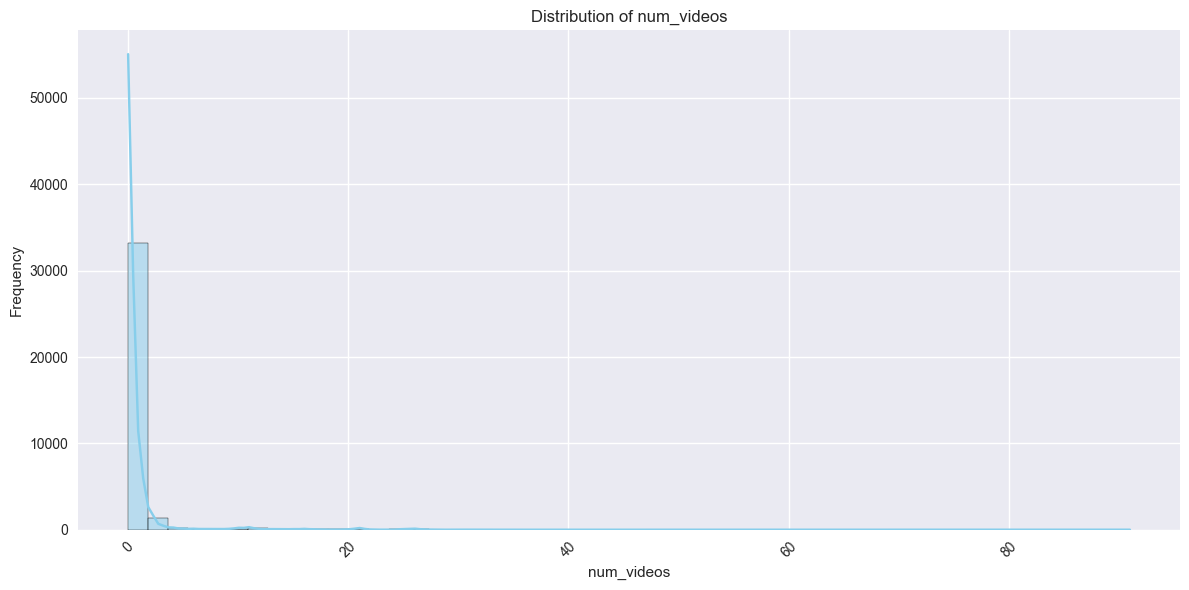

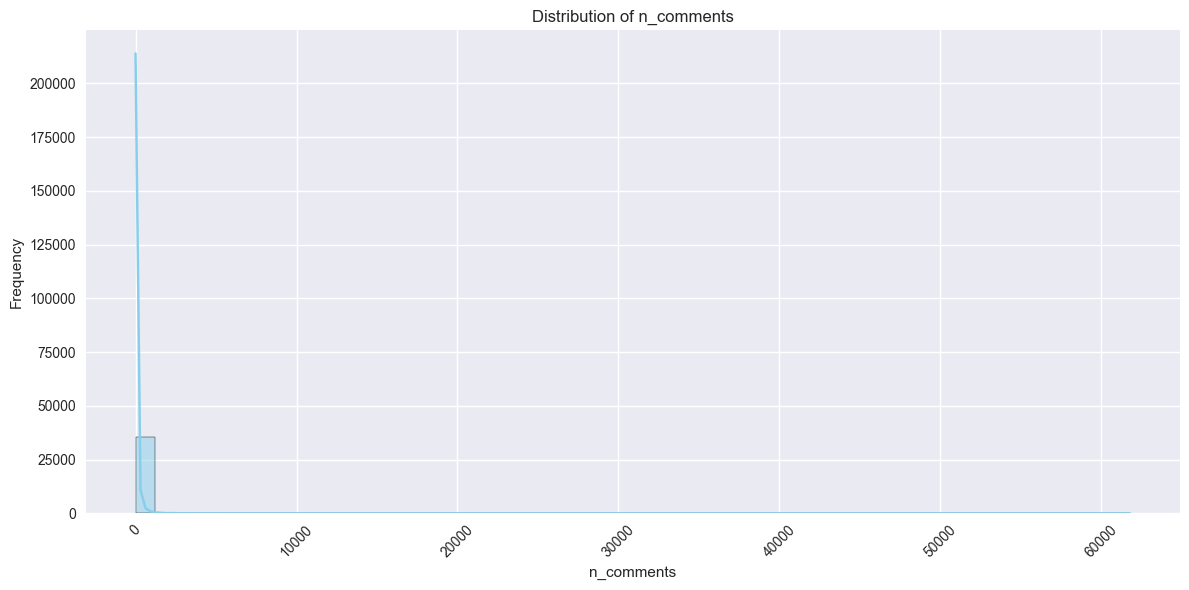

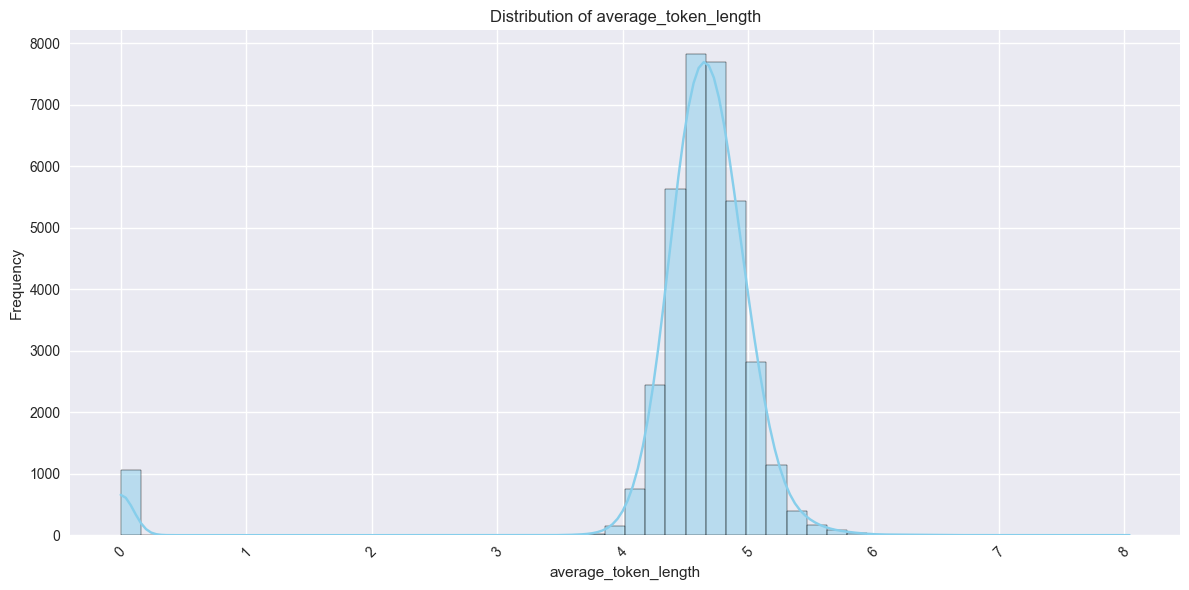

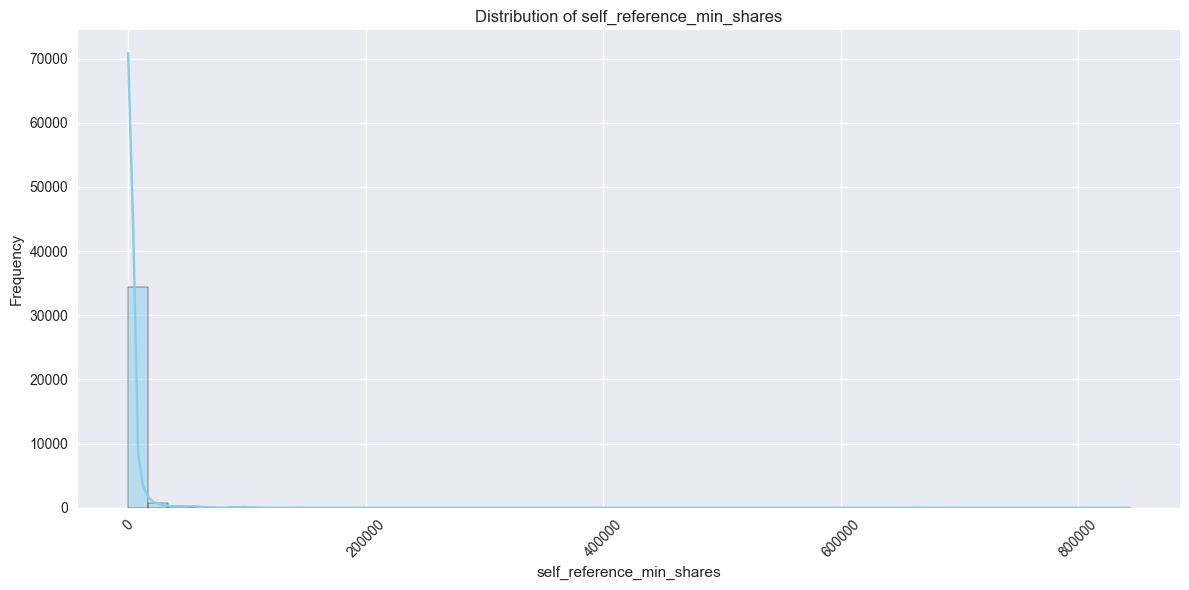

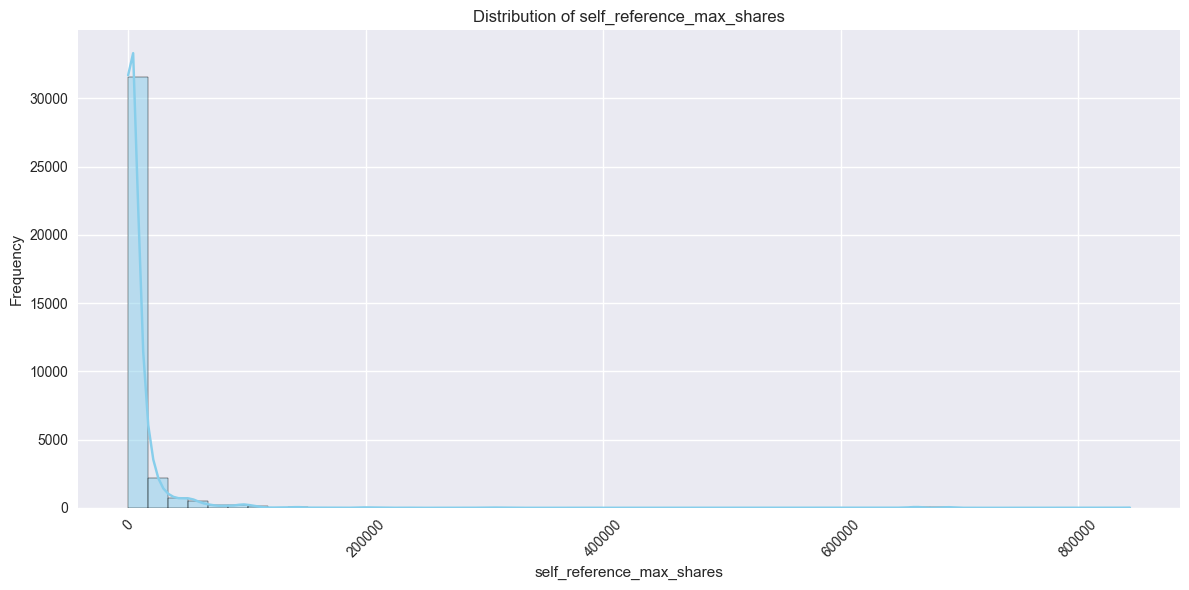

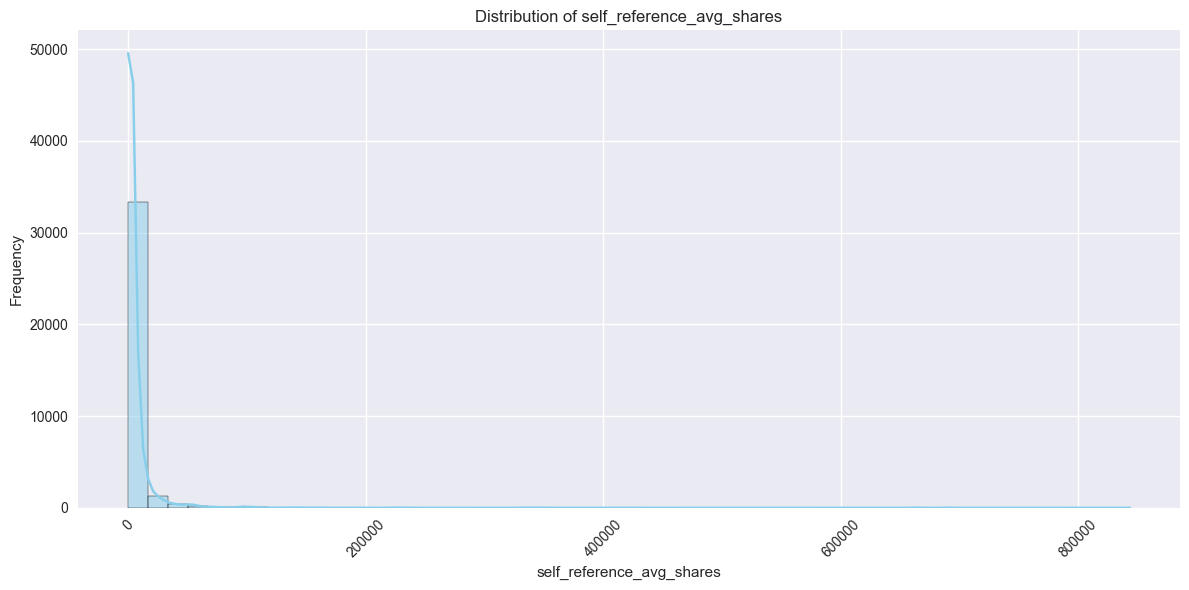

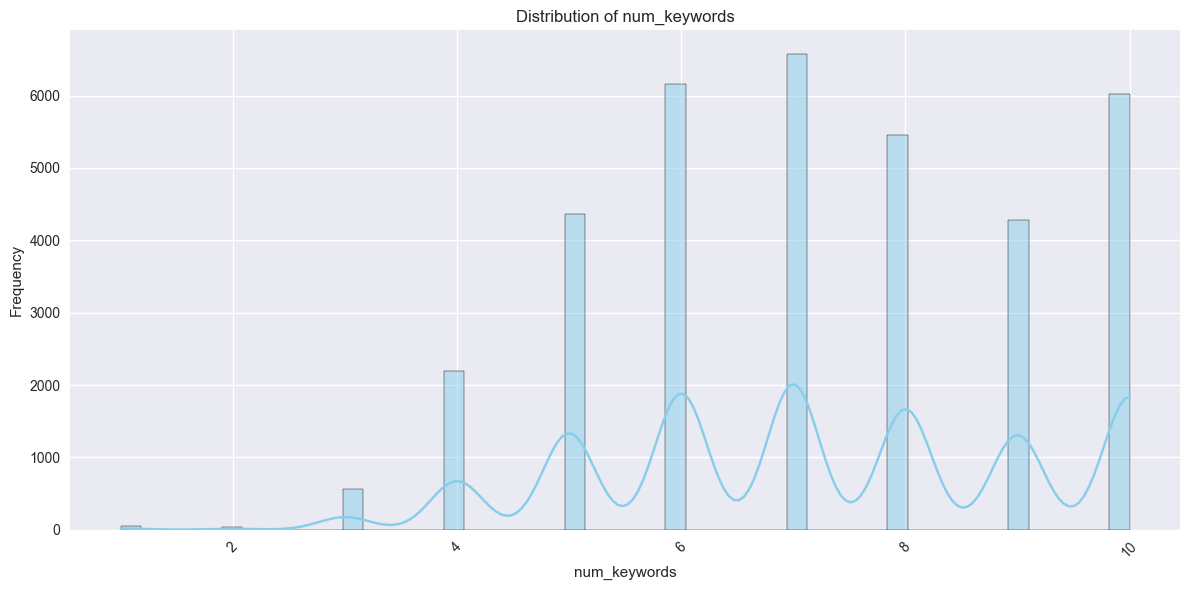

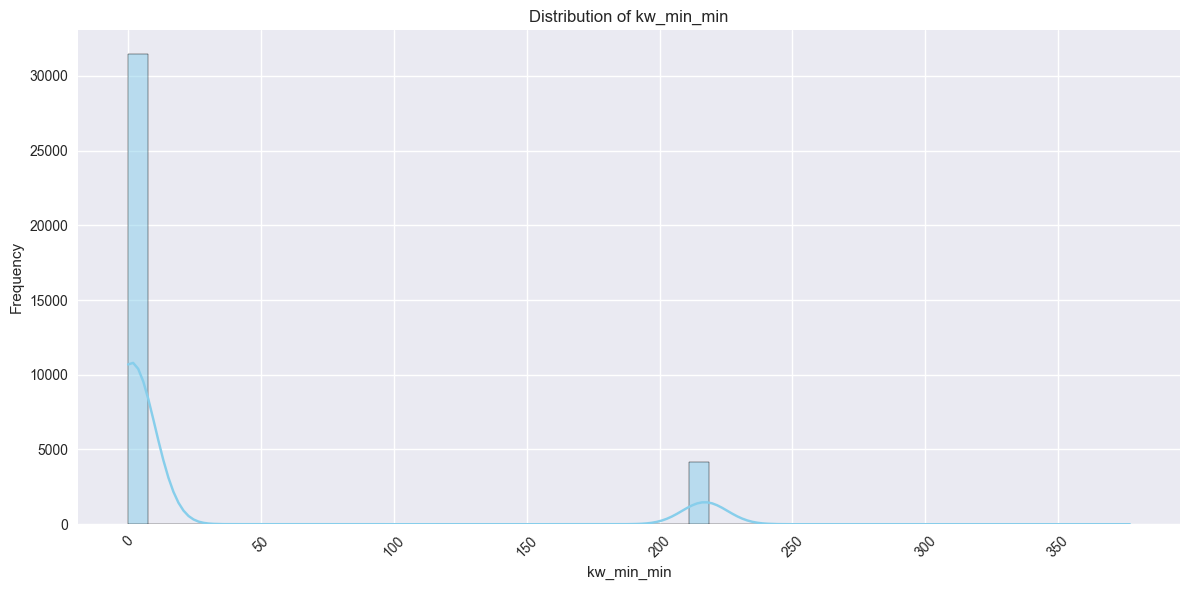

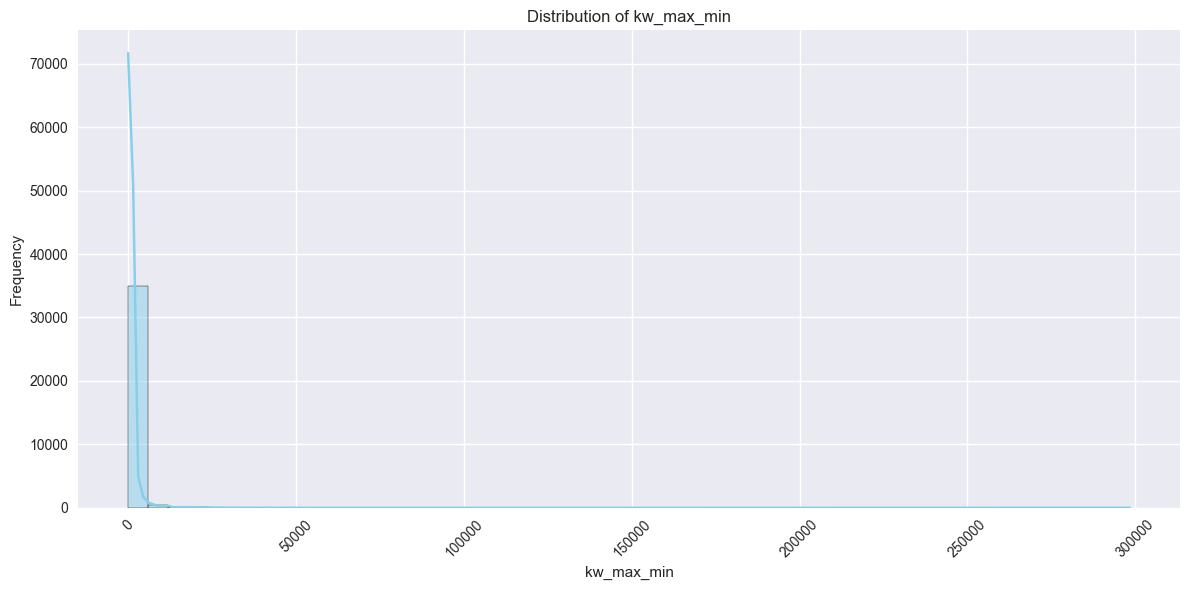

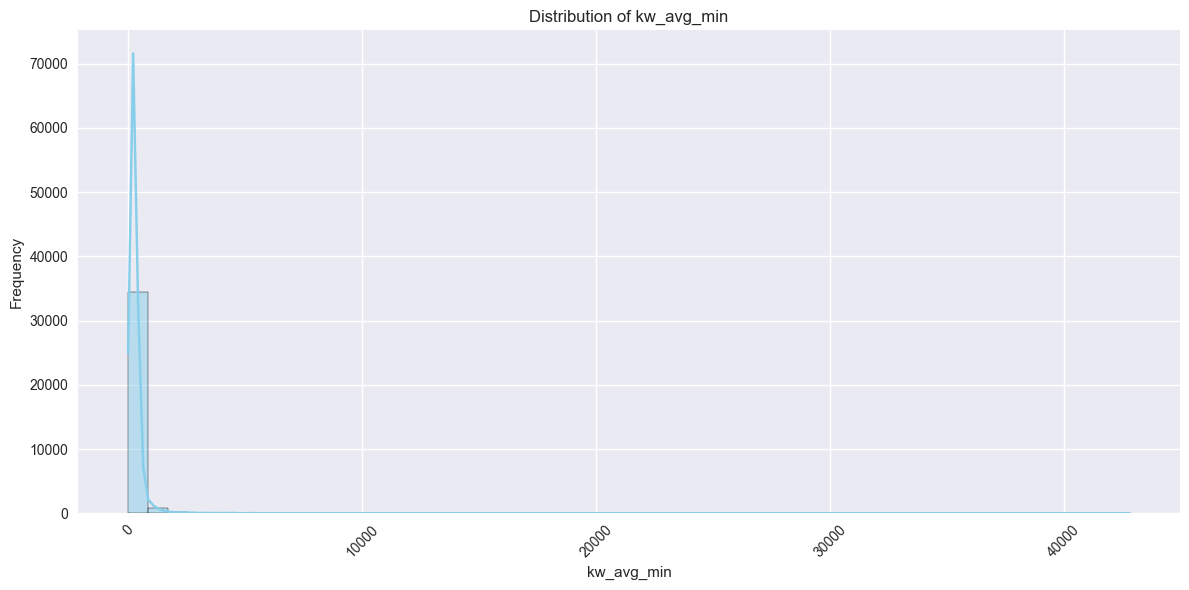

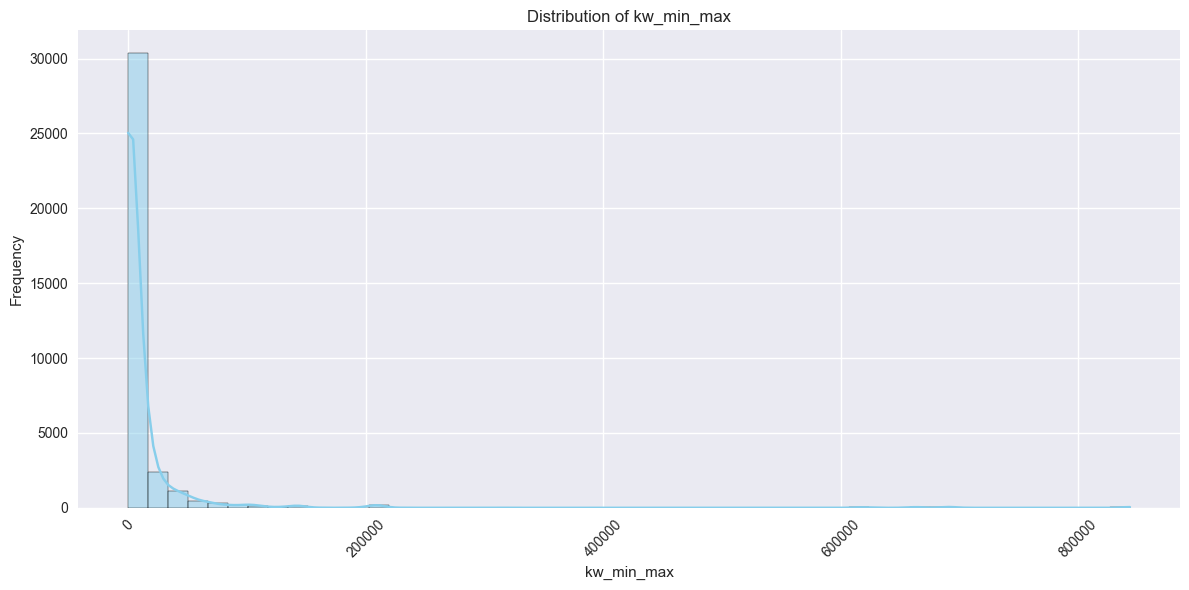

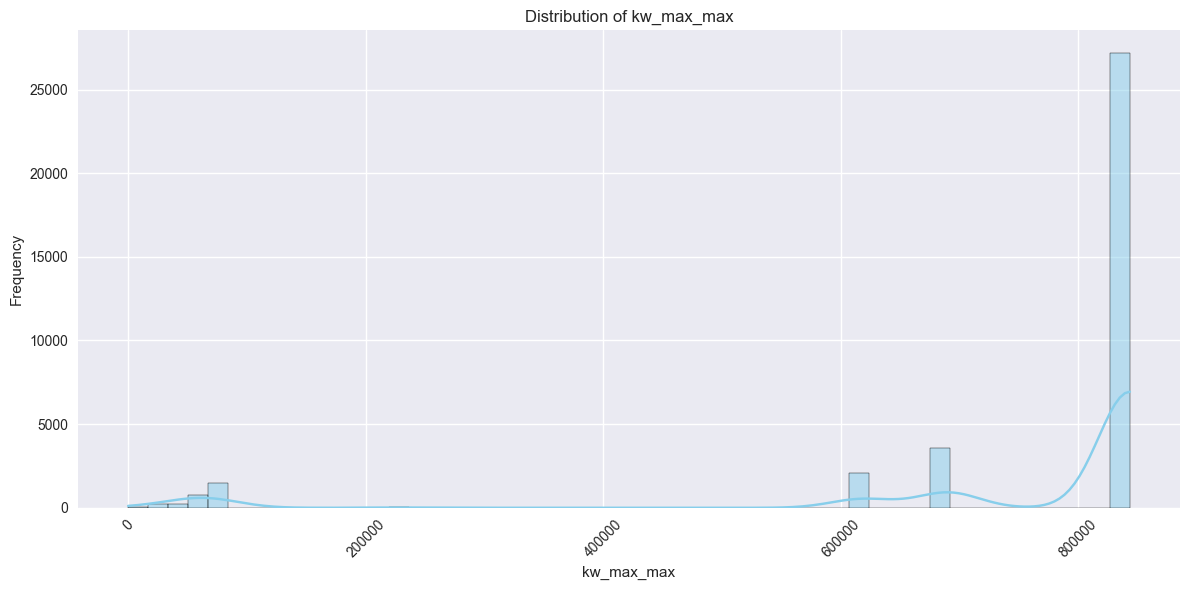

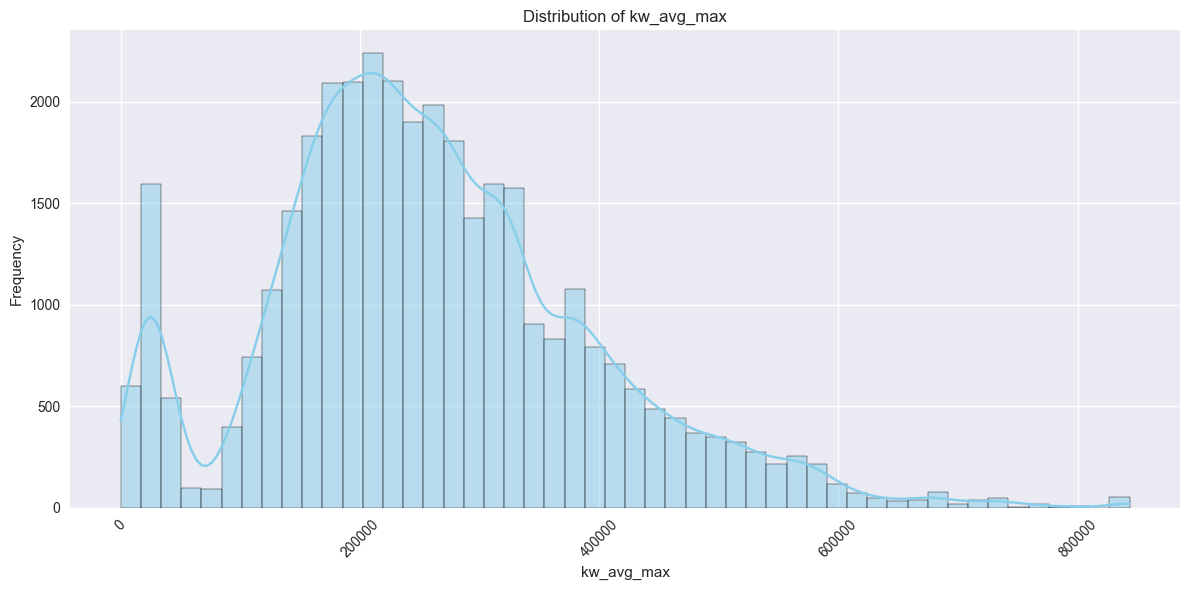

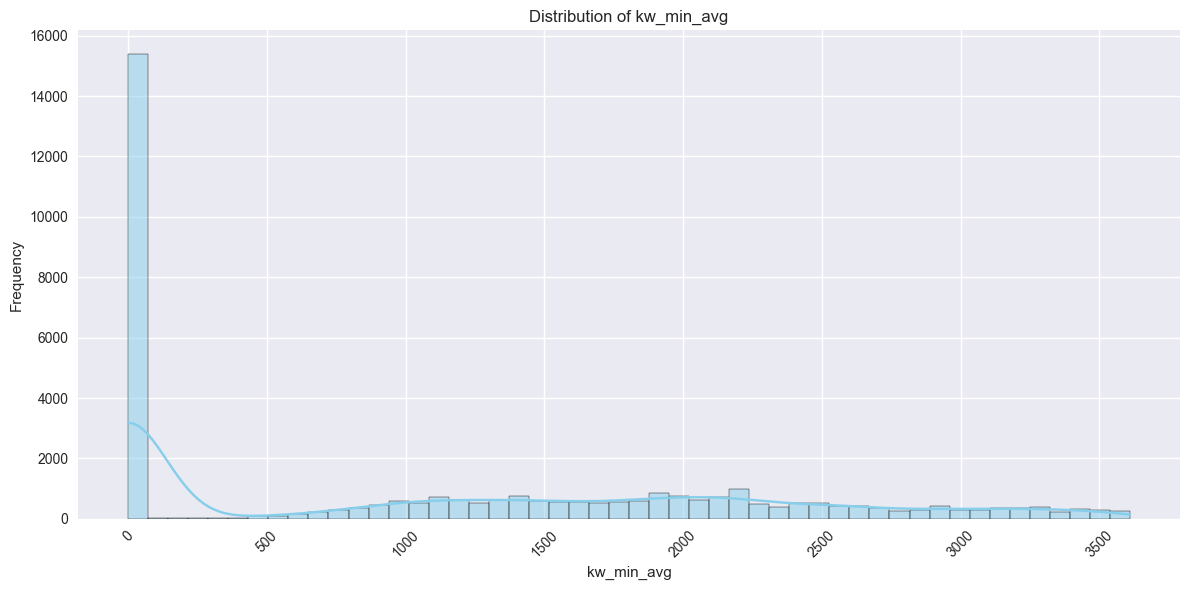

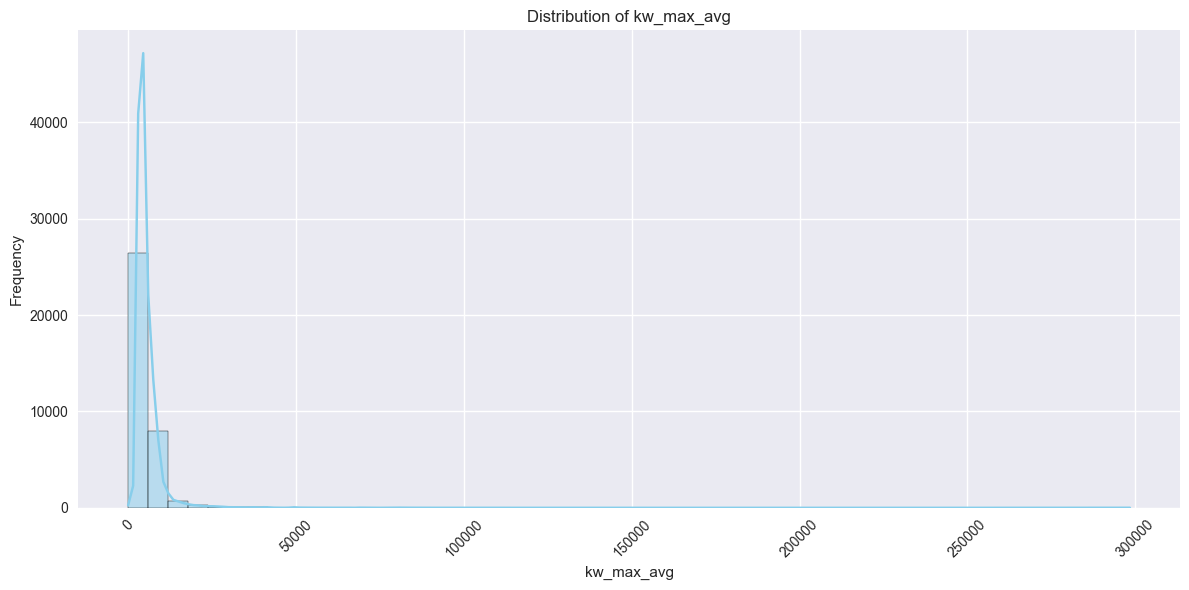

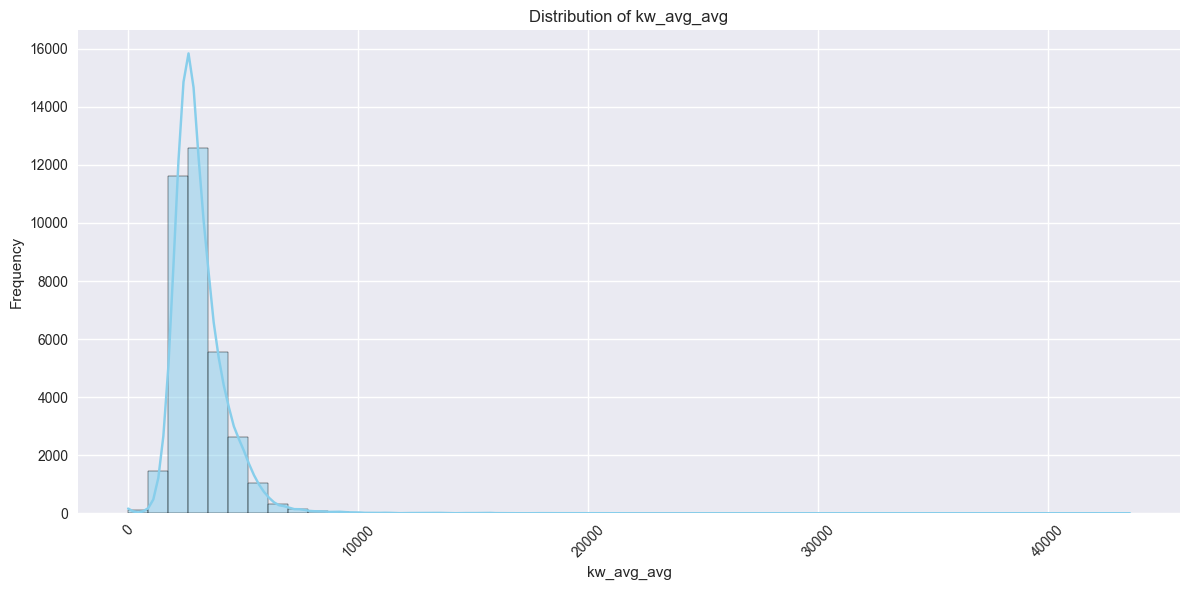

In [142]:
for feature in cont_features:
    e.hist(df, feature, bins=50)

With most charts being skewed, tree-based models and log transforming the features would be recommended

- Skewed Features:

- Right-Skewed: Most numerical features (shares, n_tokens_content, num_hrefs, num_self_hrefs, num_imgs, num_videos, n_comments, self_reference_min_shares, self_reference_max_shares, self_reference_avg_shares, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_min_avg, kw_max_avg, kw_avg_avg) show right skew, with most values concentrated at lower ranges and a few high outliers. This is typical for count-based (e.g., links, images) and performance metrics (e.g., shares, keyword shares), reflecting that most articles have modest engagement/features, with rare viral or feature-rich cases.
Left-Skewed: kw_max_max (max shares for best keyword) is left-skewed, indicating most articles have high-performing keywords, which makes sense for top keywords.
Implication: Right skew suggests tree-based models are ideal, as they handle non-normal distributions well via splits, avoiding the need for log-transformation. Outliers (e.g., high shares) are preserved as signals of virality.


- Normally Distributed:

- average_token_length: Symmetrical bell-shaped curve, with a small number at 0.1 (possibly short or malformed articles). This suggests consistent word lengths across articles, which tree models can use effectively without scaling.


- Discrete/Uniform:

- timedelta: Evenly spread, likely representing time since publication. No transformation needed; tree models handle uniform distributions well.
num_keywords: Discrete, peaking at 5-6, with moderate right skew. This categorical-like distribution is suitable for tree-based splits.
n_unique_tokens, n_non_stop_unique_tokens: Concentrated around 0.4-0.7 (rate of unique words), with a few outliers at 0.01. These are semi-continuous and work well in tree models.
n_non_stop_words: Mostly 1 (~34,900 rows), with ~800 rows at 0-0.02, indicating nearly all articles have non-stop words, with rare exceptions (e.g., short or stop-word-heavy articles).


- Key Observations:

- Shares (Target): Right-skewed (0-2,000 range, few outliers), suggesting virality is rare. Tree models handle this well, but you may still test log-transformation for shares to stabilize predictions.
- Content Features: n_tokens_title (8-12), n_tokens_content (250-500) reflect typical article lengths, with right skew indicating fewer long articles/titles.
- Keyword Features: Most are right-skewed (low shares), except kw_max_max (left-skewed, high shares). The spike in kw_min_min at 210 (~4,500 rows) is notable—possibly a common keyword with consistent low performance.

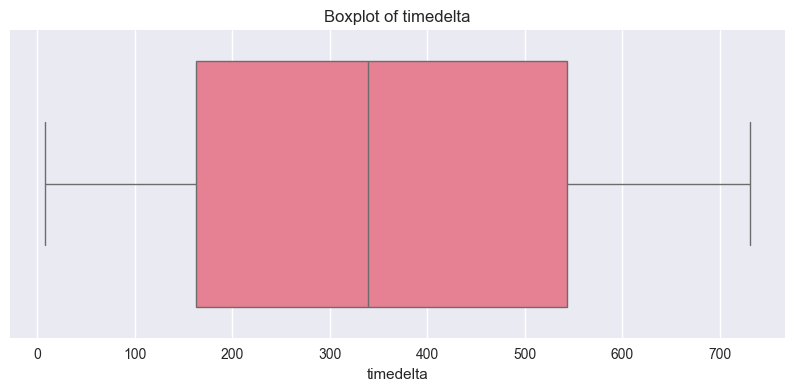


Outlier Summary for 'timedelta':
Total rows: 35680
IQR outliers: 0
Z-score outliers (threshold=3): 0


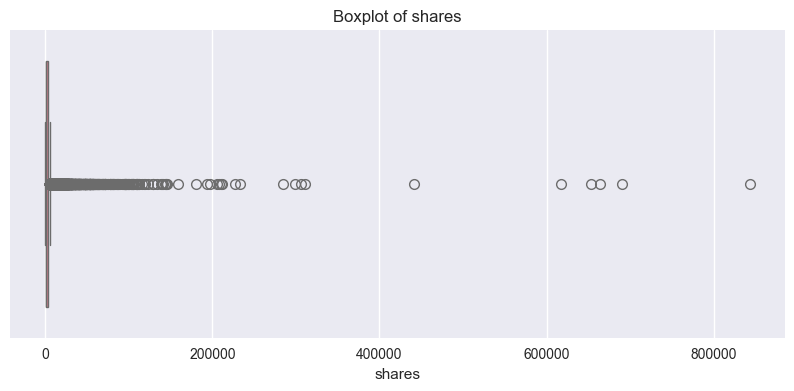


Outlier Summary for 'shares':
Total rows: 35680
IQR outliers: 4080
Z-score outliers (threshold=3): 271


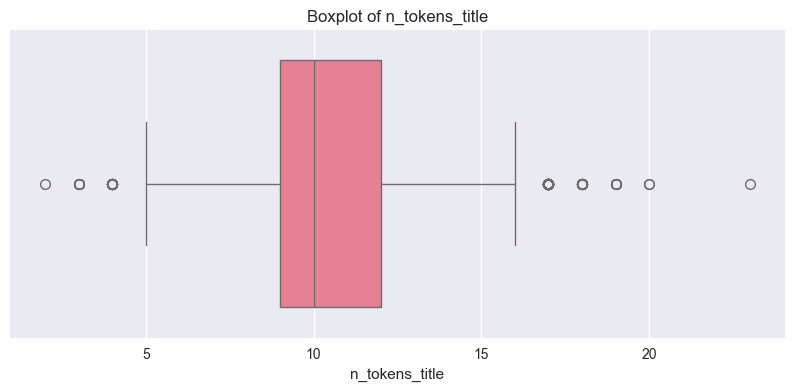


Outlier Summary for 'n_tokens_title':
Total rows: 35680
IQR outliers: 140
Z-score outliers (threshold=3): 140


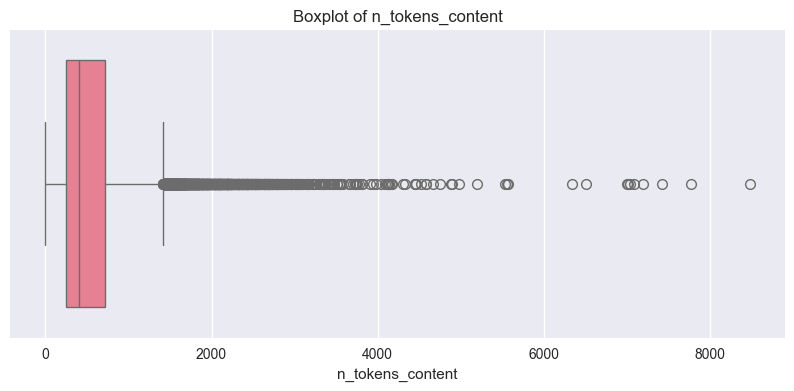


Outlier Summary for 'n_tokens_content':
Total rows: 35680
IQR outliers: 1705
Z-score outliers (threshold=3): 613


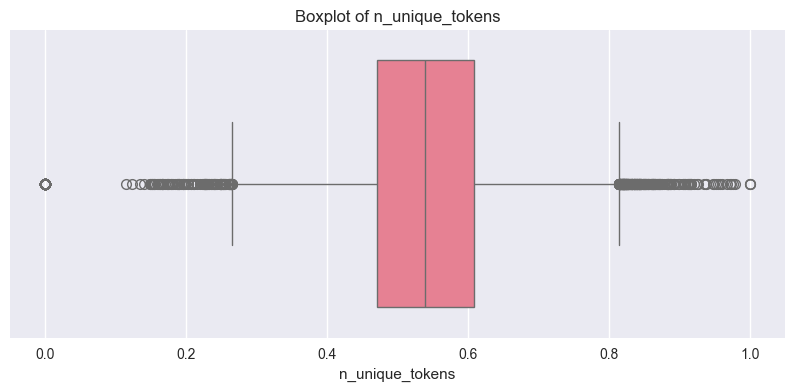


Outlier Summary for 'n_unique_tokens':
Total rows: 35680
IQR outliers: 1460
Z-score outliers (threshold=3): 1076


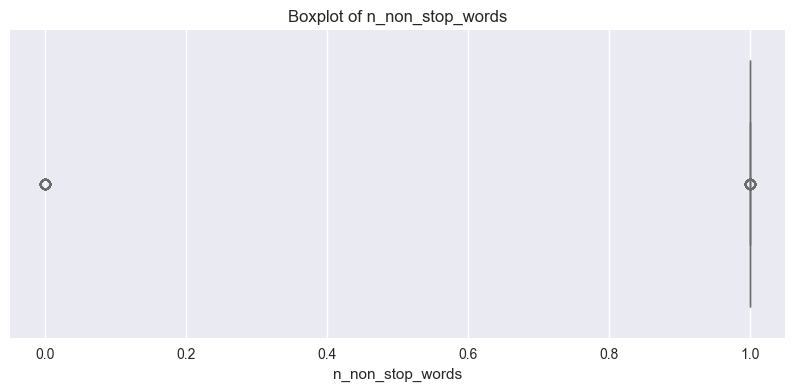


Outlier Summary for 'n_non_stop_words':
Total rows: 35680
IQR outliers: 2536
Z-score outliers (threshold=3): 1061


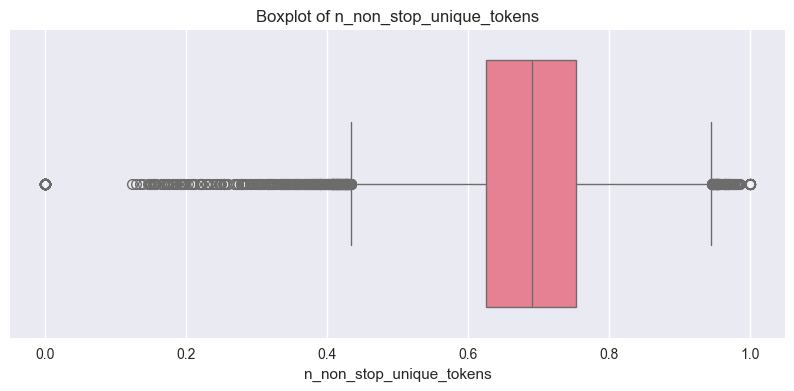


Outlier Summary for 'n_non_stop_unique_tokens':
Total rows: 35680
IQR outliers: 1572
Z-score outliers (threshold=3): 1099


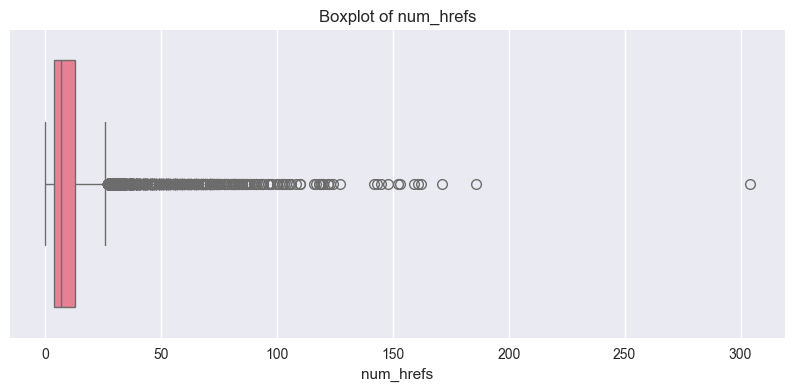


Outlier Summary for 'num_hrefs':
Total rows: 35680
IQR outliers: 2515
Z-score outliers (threshold=3): 643


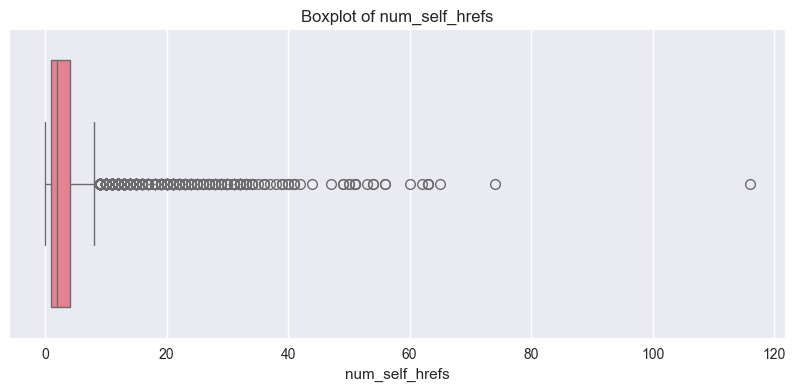


Outlier Summary for 'num_self_hrefs':
Total rows: 35680
IQR outliers: 1814
Z-score outliers (threshold=3): 595


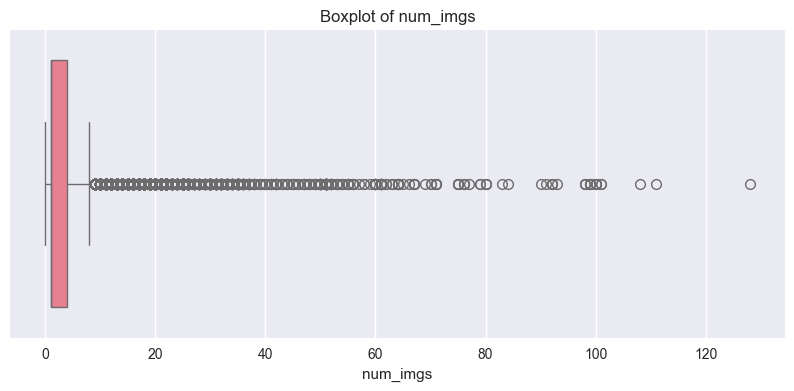


Outlier Summary for 'num_imgs':
Total rows: 35680
IQR outliers: 6614
Z-score outliers (threshold=3): 760


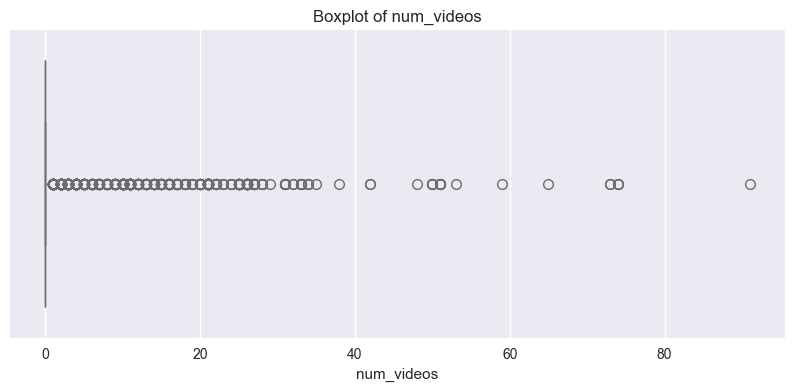


Outlier Summary for 'num_videos':
Total rows: 35680
IQR outliers: 7031
Z-score outliers (threshold=3): 828


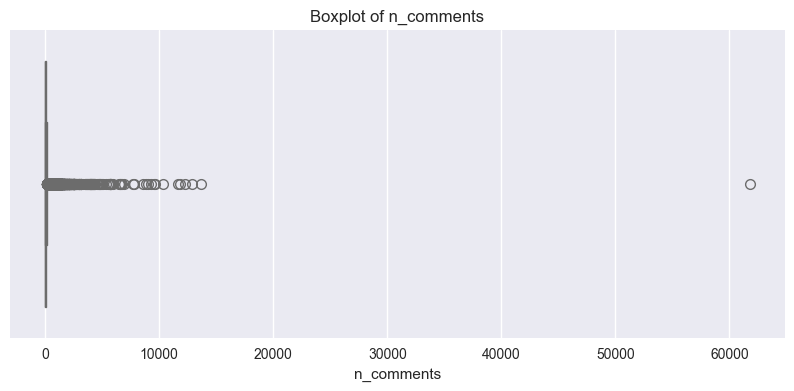


Outlier Summary for 'n_comments':
Total rows: 35680
IQR outliers: 3461
Z-score outliers (threshold=3): 237


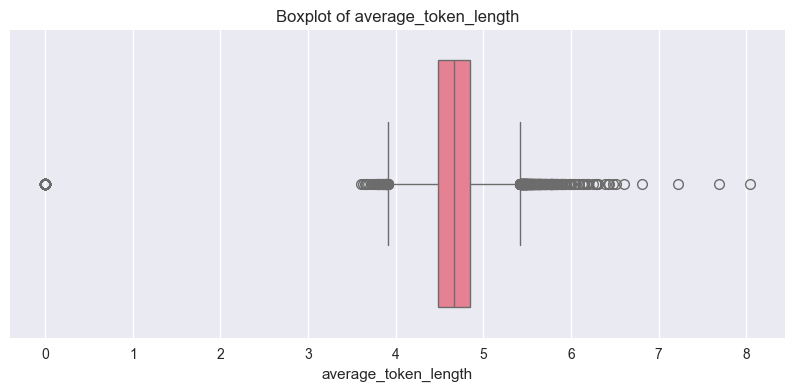


Outlier Summary for 'average_token_length':
Total rows: 35680
IQR outliers: 1513
Z-score outliers (threshold=3): 1064


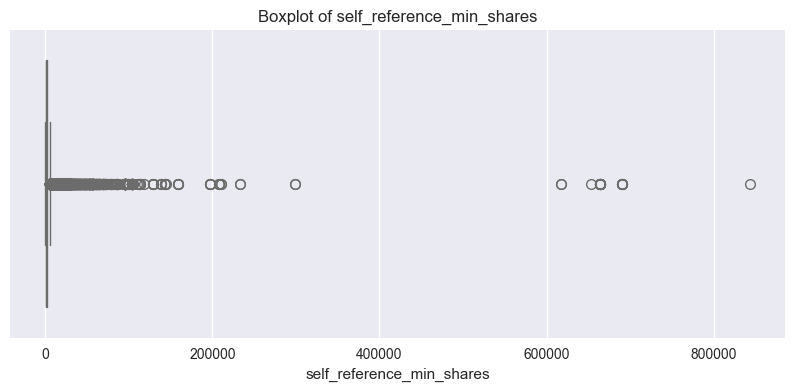


Outlier Summary for 'self_reference_min_shares':
Total rows: 35680
IQR outliers: 4301
Z-score outliers (threshold=3): 242


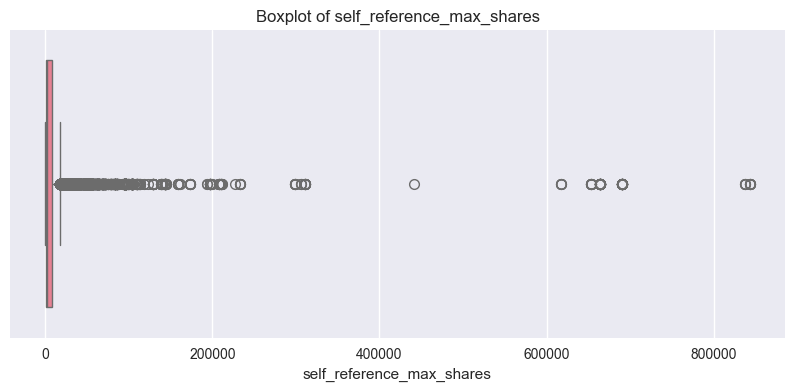


Outlier Summary for 'self_reference_max_shares':
Total rows: 35680
IQR outliers: 3851
Z-score outliers (threshold=3): 225


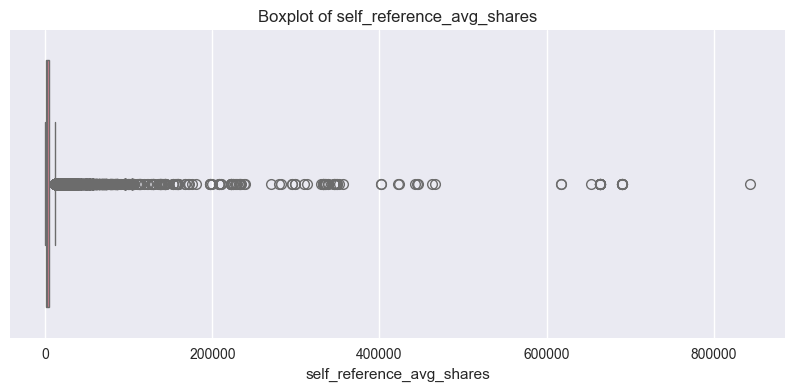


Outlier Summary for 'self_reference_avg_shares':
Total rows: 35680
IQR outliers: 3806
Z-score outliers (threshold=3): 290


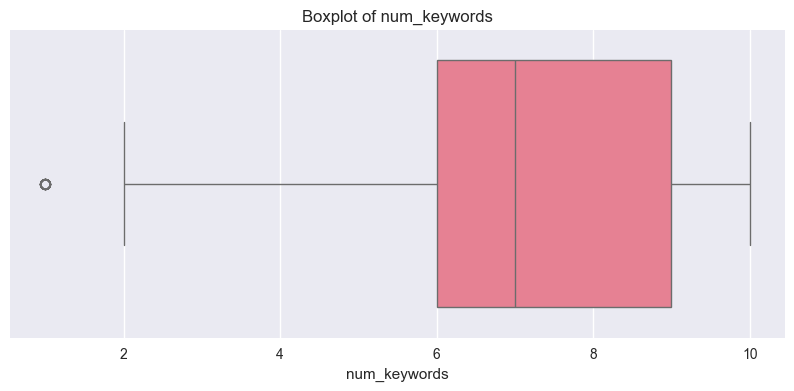


Outlier Summary for 'num_keywords':
Total rows: 35680
IQR outliers: 49
Z-score outliers (threshold=3): 49


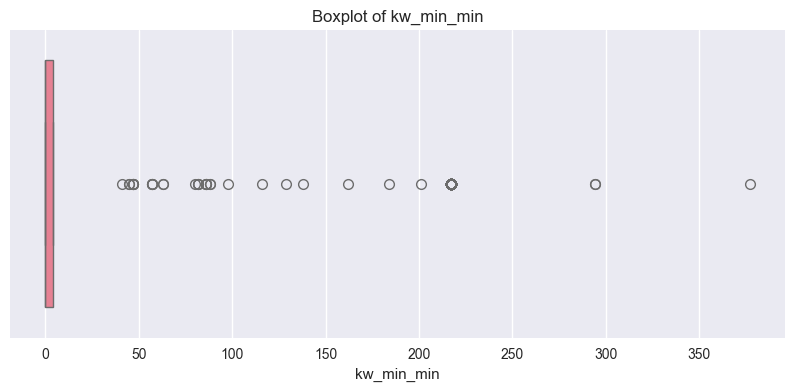


Outlier Summary for 'kw_min_min':
Total rows: 35680
IQR outliers: 4218
Z-score outliers (threshold=3): 3


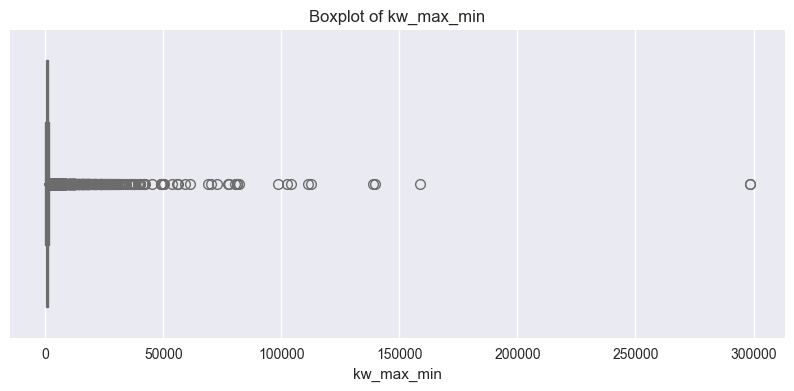


Outlier Summary for 'kw_max_min':
Total rows: 35680
IQR outliers: 3262
Z-score outliers (threshold=3): 237


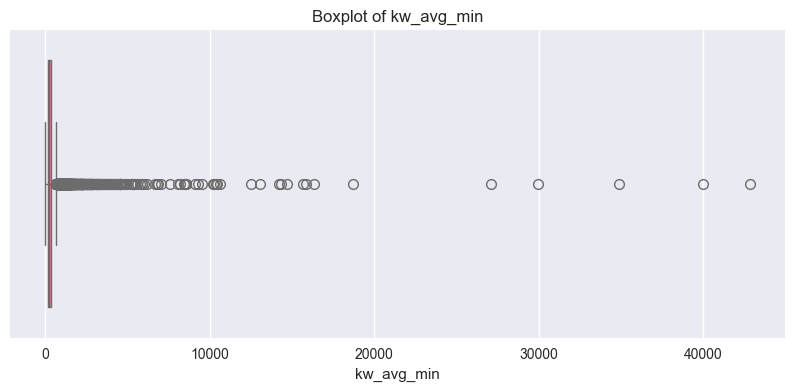


Outlier Summary for 'kw_avg_min':
Total rows: 35680
IQR outliers: 1843
Z-score outliers (threshold=3): 245


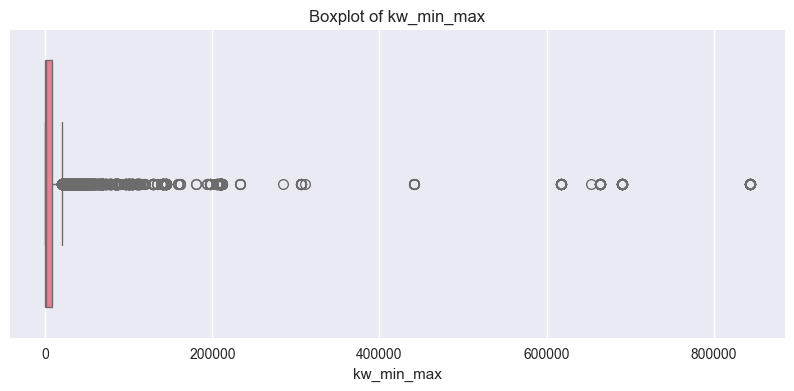


Outlier Summary for 'kw_min_max':
Total rows: 35680
IQR outliers: 4581
Z-score outliers (threshold=3): 420


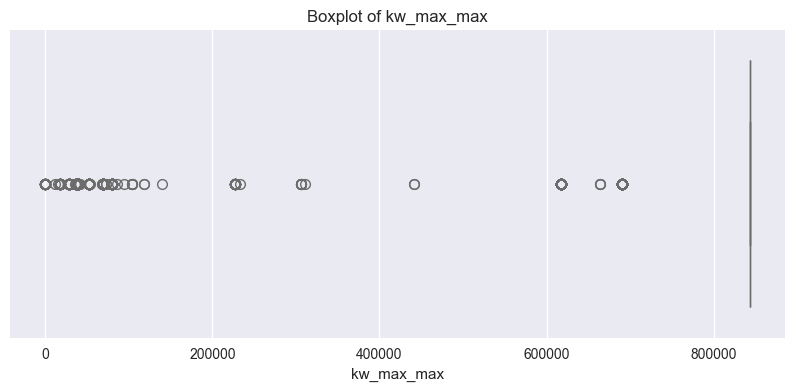


Outlier Summary for 'kw_max_max':
Total rows: 35680
IQR outliers: 8505
Z-score outliers (threshold=3): 2784


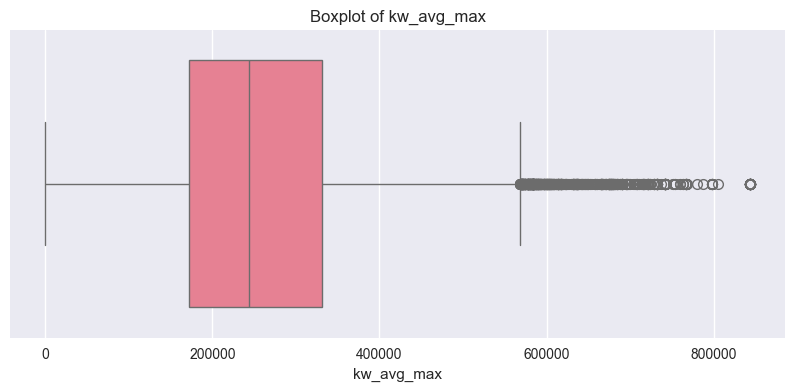


Outlier Summary for 'kw_avg_max':
Total rows: 35680
IQR outliers: 864
Z-score outliers (threshold=3): 302


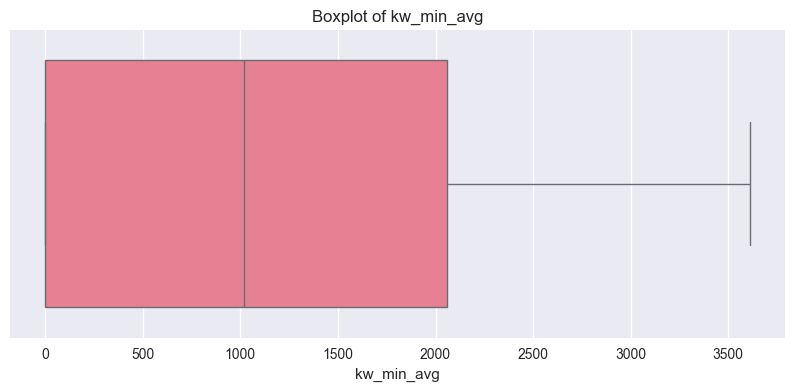


Outlier Summary for 'kw_min_avg':
Total rows: 35680
IQR outliers: 0
Z-score outliers (threshold=3): 0


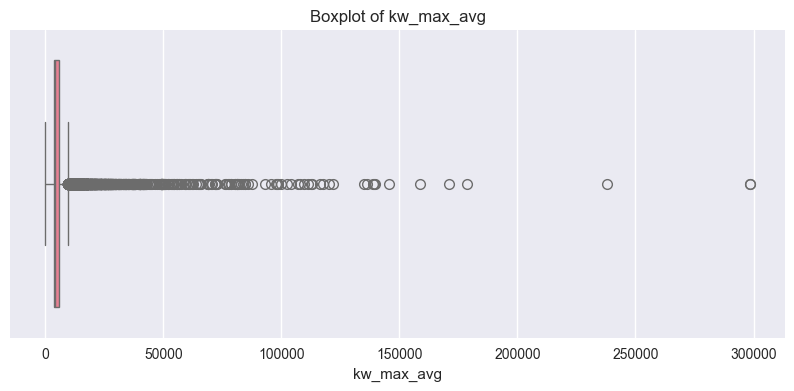


Outlier Summary for 'kw_max_avg':
Total rows: 35680
IQR outliers: 2150
Z-score outliers (threshold=3): 356


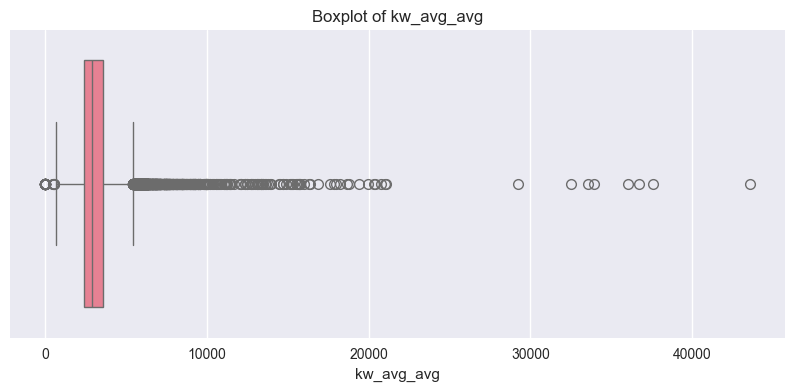


Outlier Summary for 'kw_avg_avg':
Total rows: 35680
IQR outliers: 1466
Z-score outliers (threshold=3): 342


In [143]:
# Detect outliers 
for feature in cont_features:
    e.detect_outliers(df, feature)

Given the outliers in the features, a tree-based model would be able to handle these better since the outliers are most likely geniune where more shares(viral content) would be more rare

In [144]:
def analyze_outliers_common_features(df, target_col='shares', outlier_method='IQR', z_threshold=3, 
                                     categorical_features=['data_channel', 'weekday'],
                                     numerical_features=['n_tokens_title', 'n_tokens_content', 'num_hrefs', 
                                                         'num_imgs', 'num_videos', 'n_comments', 
                                                         'kw_avg_avg', 'kw_avg_min']):
    """
    Analyzes if outliers in the target column share common features.
    
    Parameters:
    - df: pandas DataFrame
    - target_col: str, column to detect outliers in (default: 'shares')
    - outlier_method: str, 'IQR' or 'Z-score' (default: 'IQR')
    - z_threshold: float, Z-score threshold (default: 3)
    - categorical_features: list of str, categorical columns to analyze
    - numerical_features: list of str, numerical columns to analyze
    
    Returns:
    - dict with outlier stats, categorical comparisons, and numerical comparisons
    """
    
    # Step 1: Detect outliers
    if outlier_method == 'IQR':
        Q1 = df[target_col].quantile(0.25)
        Q3 = df[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
    elif outlier_method == 'Z-score':
        z_scores = np.abs((df[target_col] - df[target_col].mean()) / df[target_col].std())
        outliers = df[z_scores > z_threshold]
    else:
        raise ValueError("Invalid outlier_method: Choose 'IQR' or 'Z-score'")
    
    non_outliers = df[~df.index.isin(outliers.index)]
    
    # Step 2: Basic outlier stats
    stats = {
        'total_rows': len(df),
        'num_outliers': len(outliers),
        'outlier_percentage': (len(outliers) / len(df)) * 100,
        'outlier_method': outlier_method
    }
    
    # Step 3: Categorical feature comparisons
    cat_comparisons = {}
    for cat in categorical_features:
        if cat in df.columns:
            outlier_counts = outliers[cat].value_counts(normalize=True) * 100  # Percentages
            non_outlier_counts = non_outliers[cat].value_counts(normalize=True) * 100
            cat_comparisons[cat] = {
                'outlier_percentages': outlier_counts,
                'non_outlier_percentages': non_outlier_counts
            }
    
    # Step 4: Numerical feature comparisons
    num_comparisons = {}
    for num in numerical_features:
        if num in df.columns:
            outlier_stats = outliers[num].describe()
            non_outlier_stats = non_outliers[num].describe()
            num_comparisons[num] = {
                'outlier_stats': outlier_stats,
                'non_outlier_stats': non_outlier_stats
            }
    
    # Combine results
    results = {
        'outlier_stats': stats,
        'categorical_comparisons': cat_comparisons,
        'numerical_comparisons': num_comparisons
    }
    
    return results

results = analyze_outliers_common_features(df, outlier_method='IQR')  # Or 'Z-score'
print(results['outlier_stats'])
print(results['categorical_comparisons']['data_channel'])
print(results['numerical_comparisons']['n_comments'])

{'total_rows': 35680, 'num_outliers': 4080, 'outlier_percentage': 11.434977578475337, 'outlier_method': 'IQR'}
{'outlier_percentages': data_channel
7    29.387255
5    17.549020
2    15.514706
6    12.230392
3    11.470588
4     7.328431
1     6.519608
Name: proportion, dtype: float64, 'non_outlier_percentages': data_channel
6    22.386076
5    18.753165
2    18.272152
3    16.313291
7    13.490506
4     5.664557
1     5.120253
Name: proportion, dtype: float64}
{'outlier_stats': count     4080.000000
mean       452.220343
std       1339.209018
min          0.000000
25%         17.000000
50%        108.000000
75%        540.000000
max      61790.000000
Name: n_comments, dtype: float64, 'non_outlier_stats': count    31600.000000
mean        47.886519
std         75.339825
min          0.000000
25%          2.000000
50%         12.000000
75%         66.000000
max        550.000000
Name: n_comments, dtype: float64}


- Outliers in shares and n_comments are extremely high at the top 11%, which makes sense for videos with more shares to get more comments
- data_channel 'unknown' has 29.4% of outliers in shares which indicates it's more correlated to high shares

## Bivariate Analysis

c:\Users\Admin\Downloads\news\src\eda.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette)
c:\Users\Admin\Downloads\news\src\eda.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette)
c:\Users\Admin\Downloads\news\src\eda.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette)


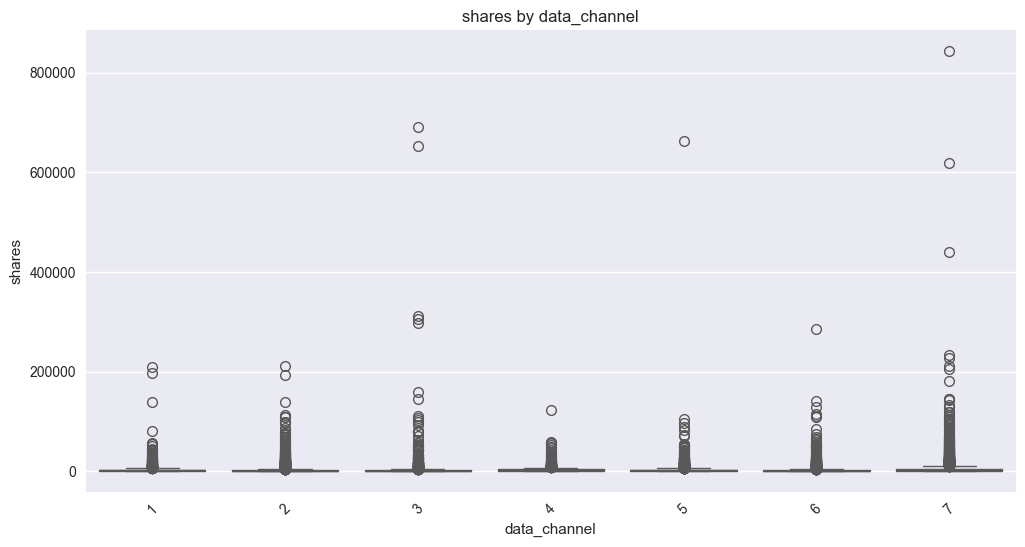

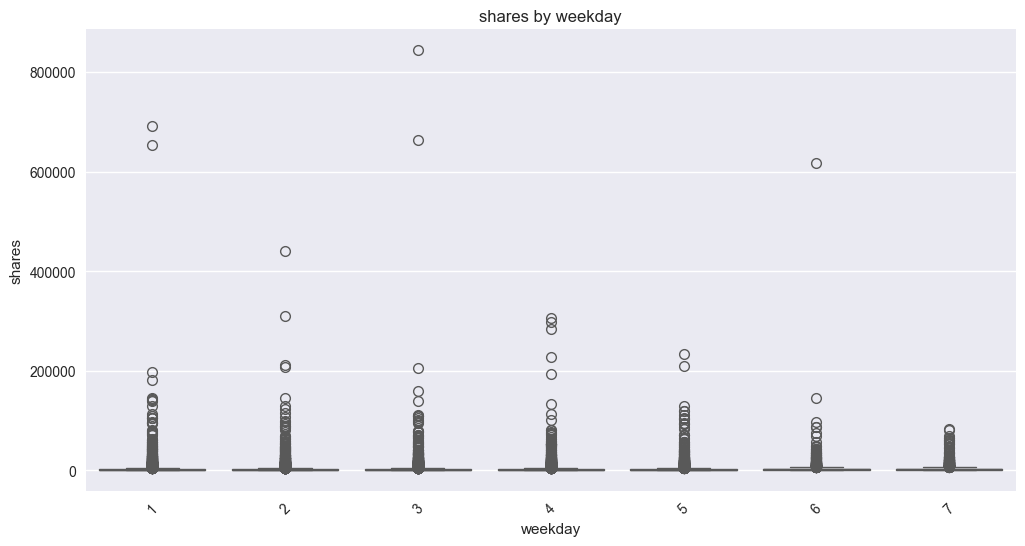

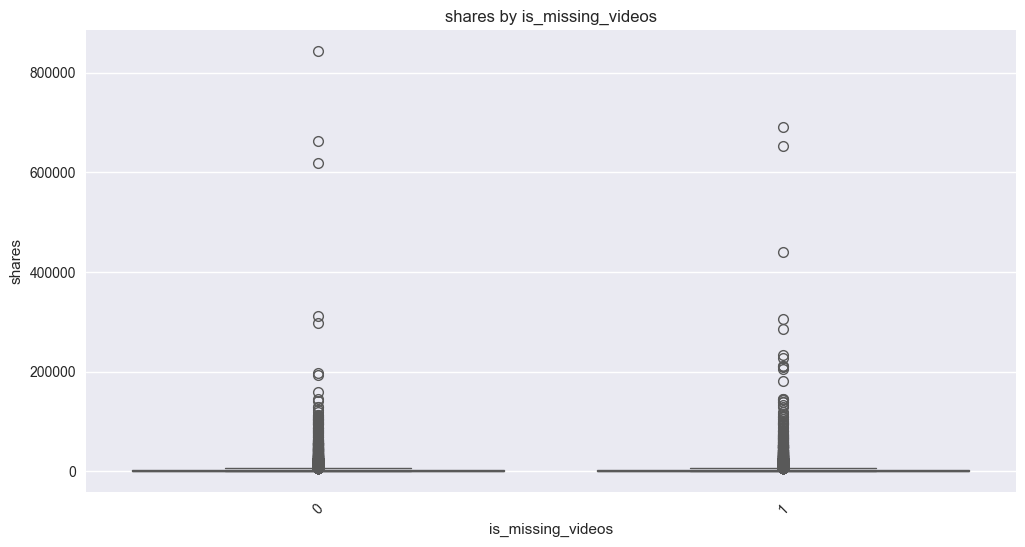

In [145]:
for feature in cat_features:
    e.box(df, feature, 'shares')

- data_channels have similar small IQR ranges indicating they don't have a large correlation with shares, though outliers in 3(business), 5(technology) and 7(unknown) show those genres have more frequency of high shares compared to other genres
- weekday is similar to data_channels with 1(Monday) and 3(wednesday) having more outliers than other days

c:\Users\Admin\Downloads\news\src\eda.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


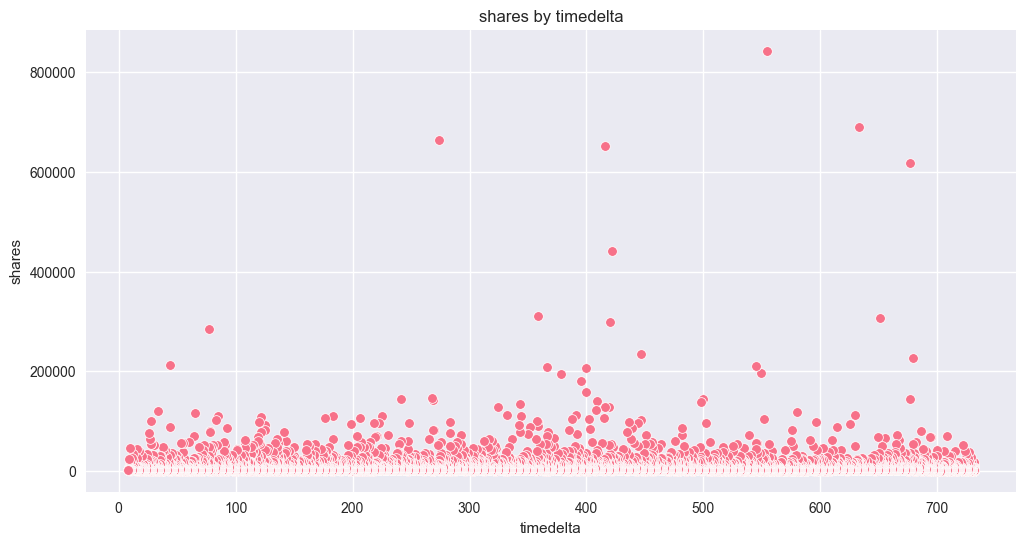

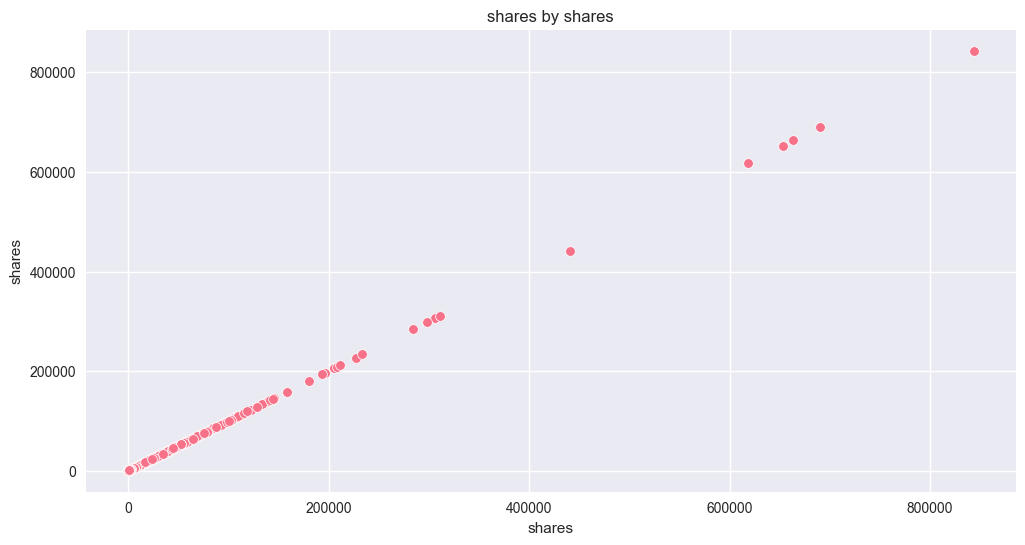

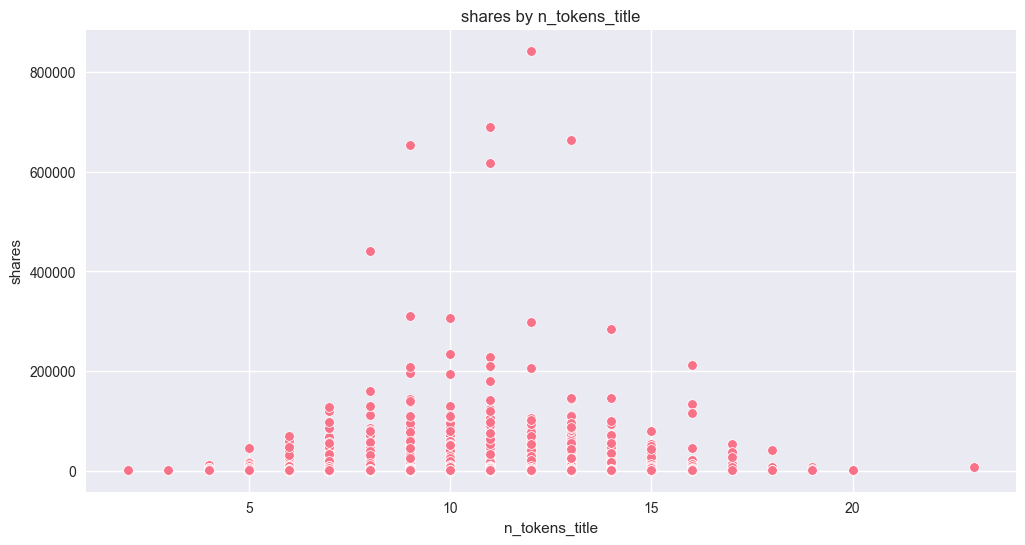

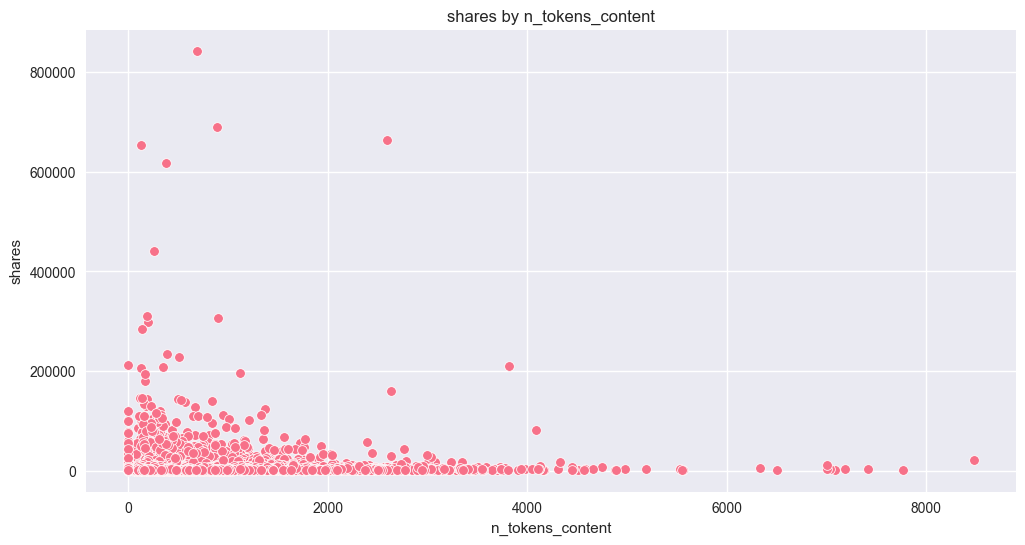

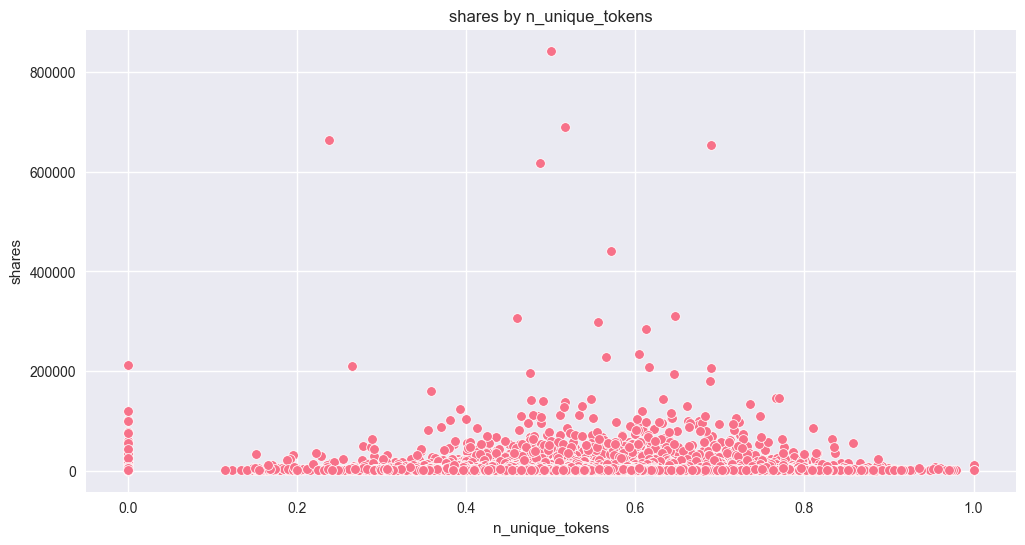

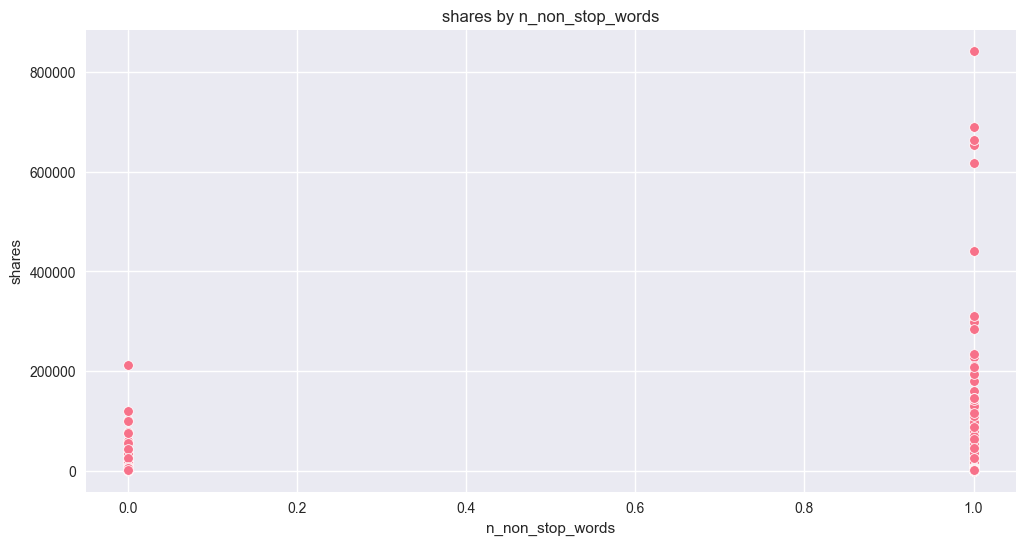

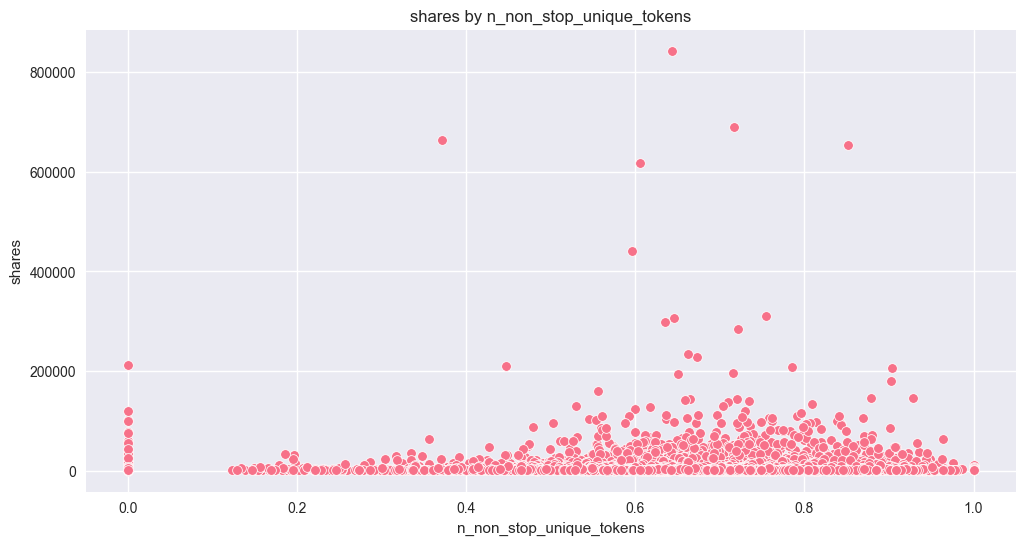

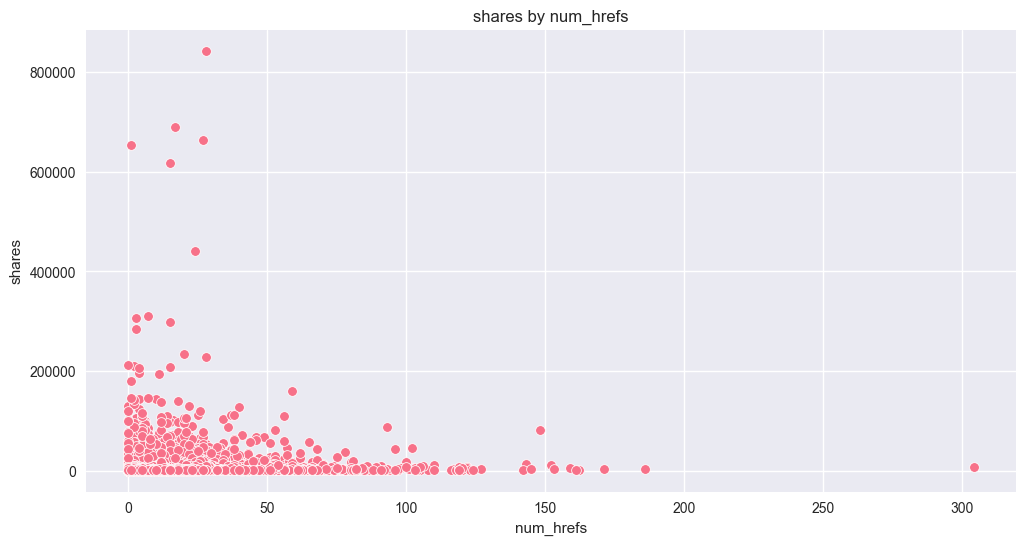

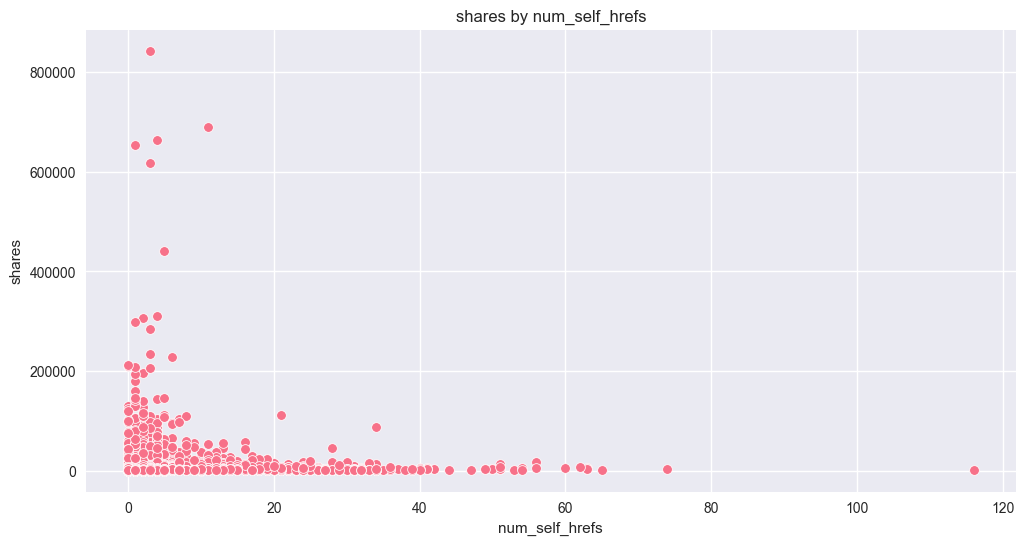

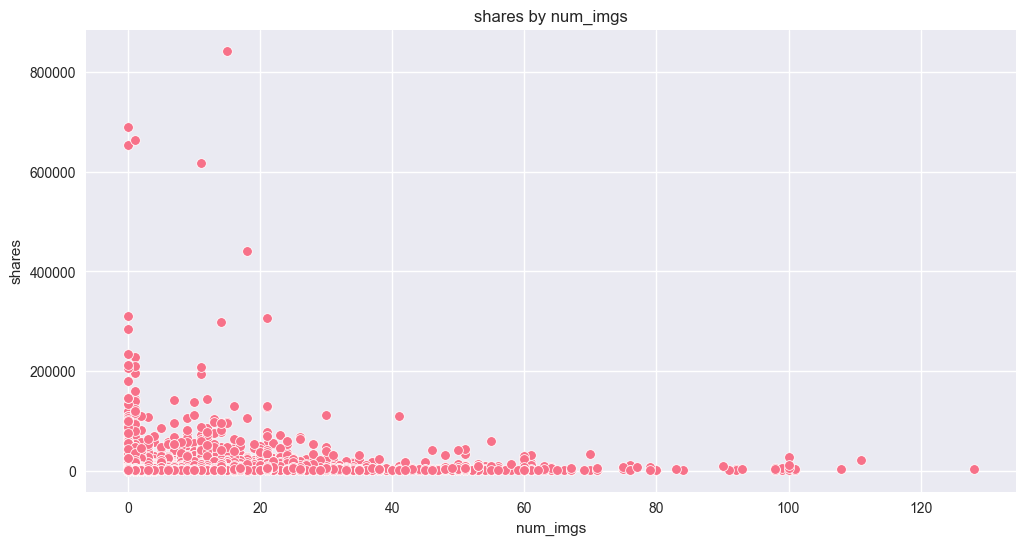

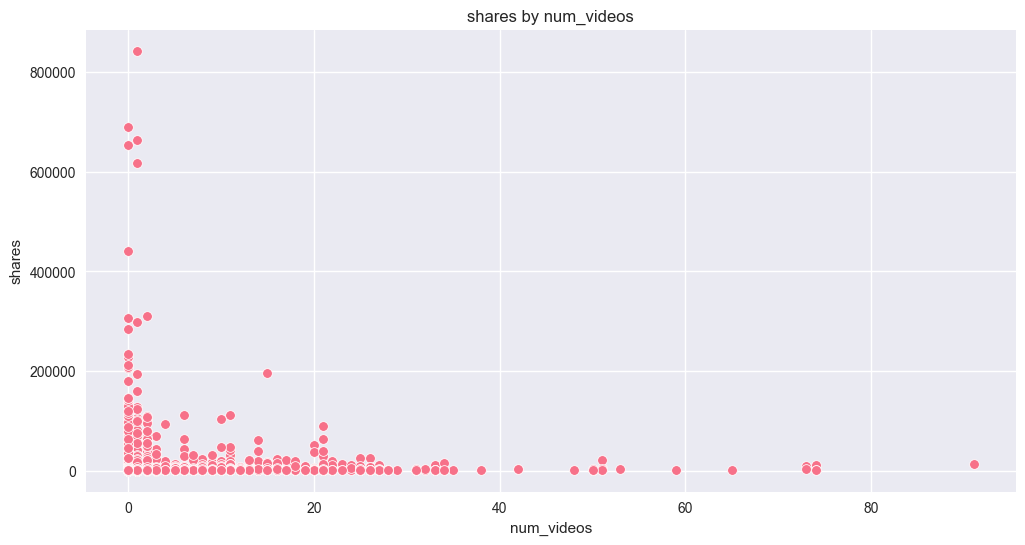

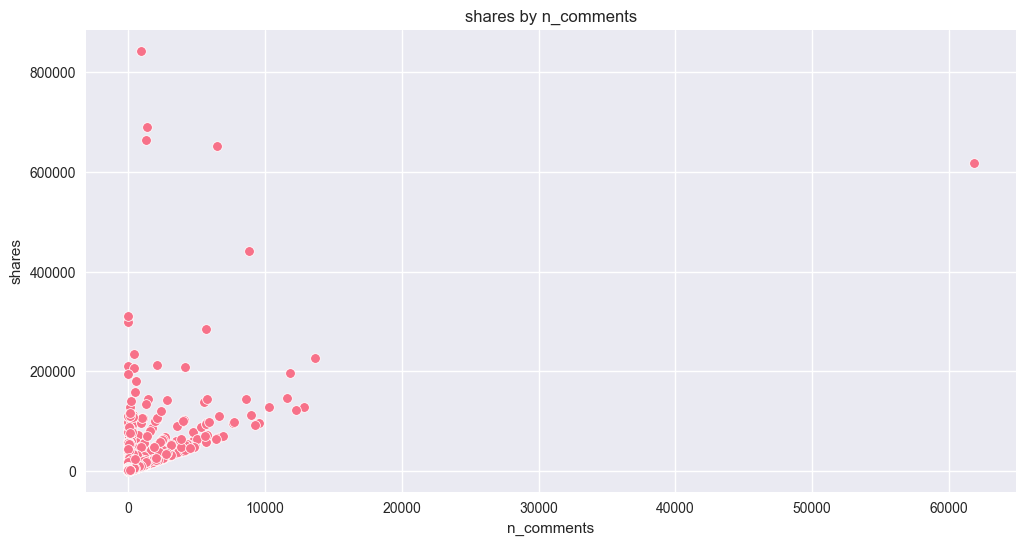

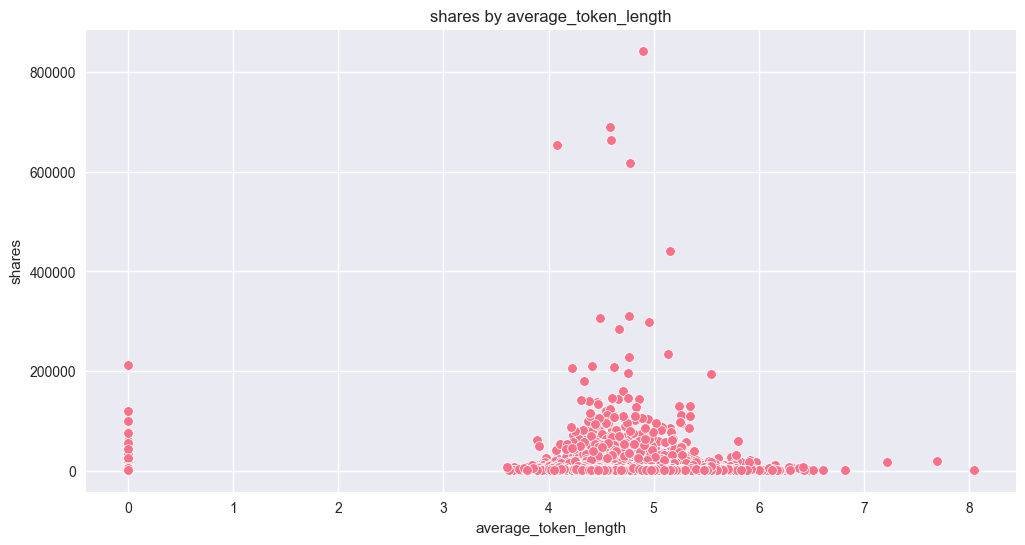

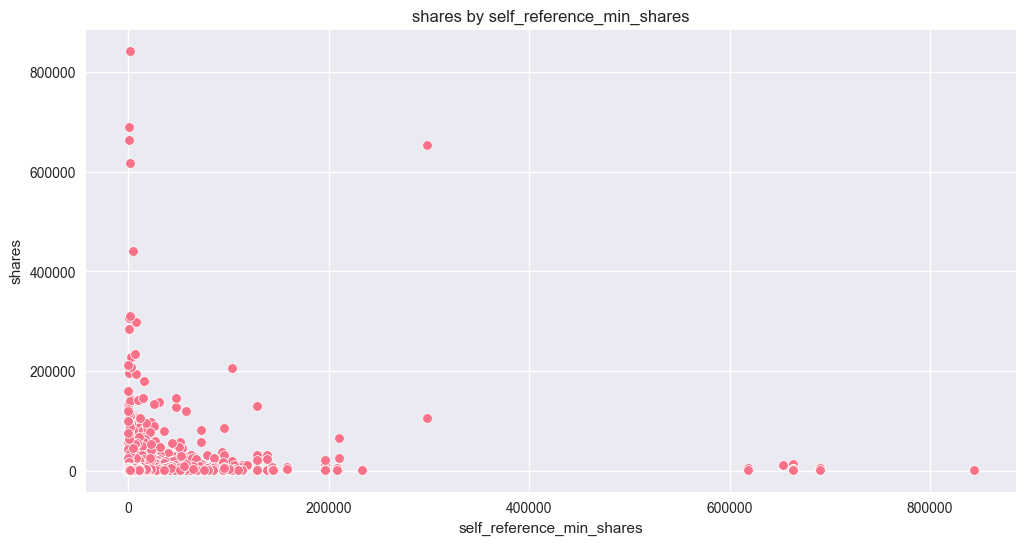

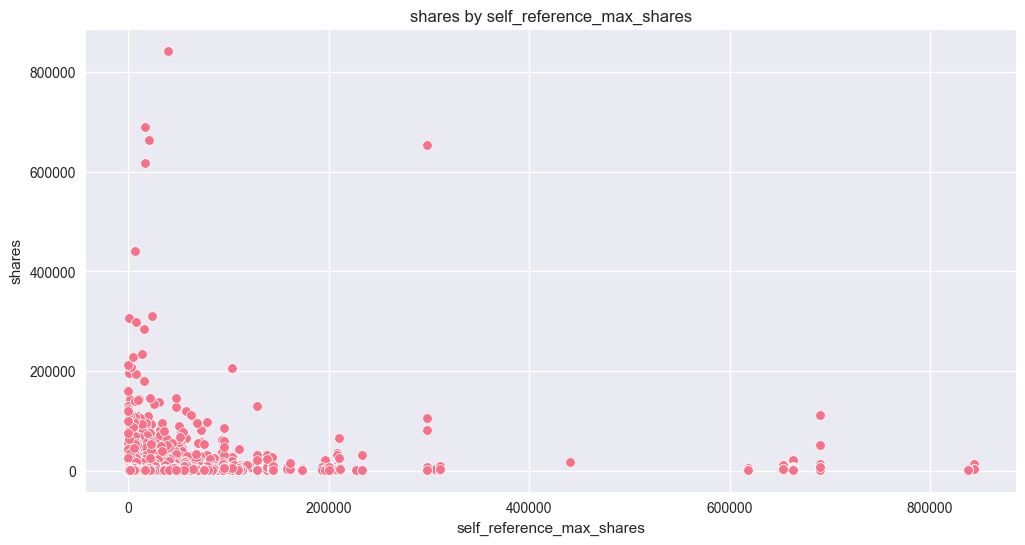

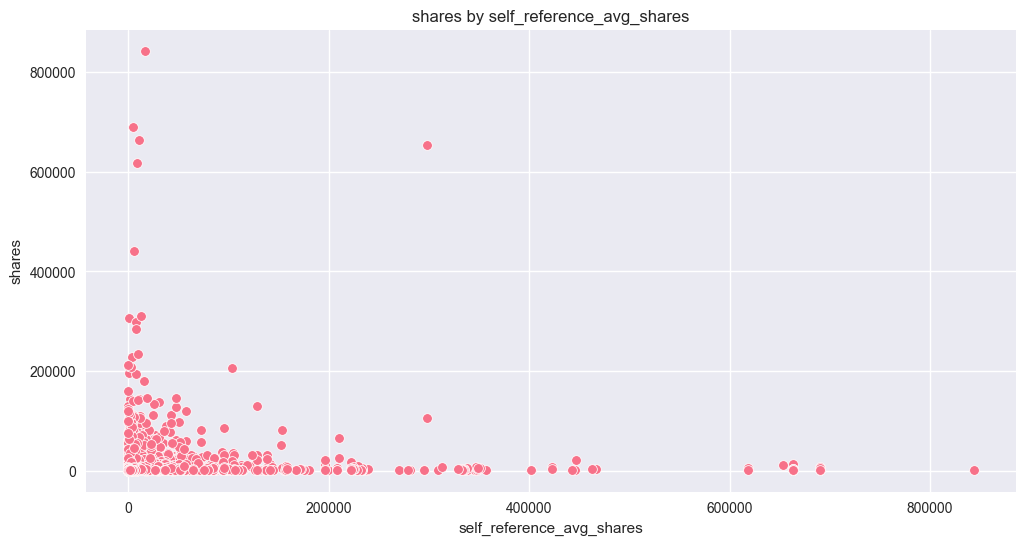

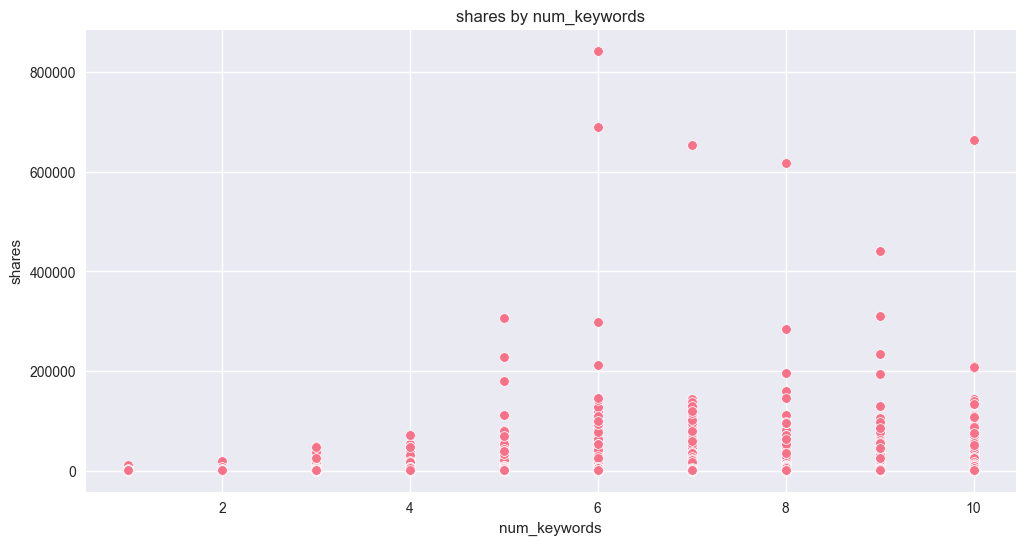

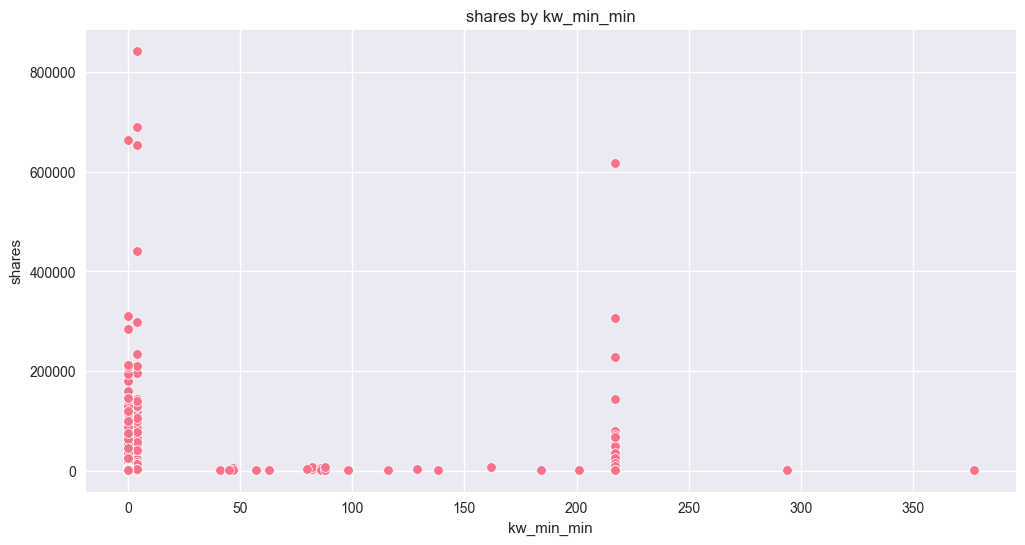

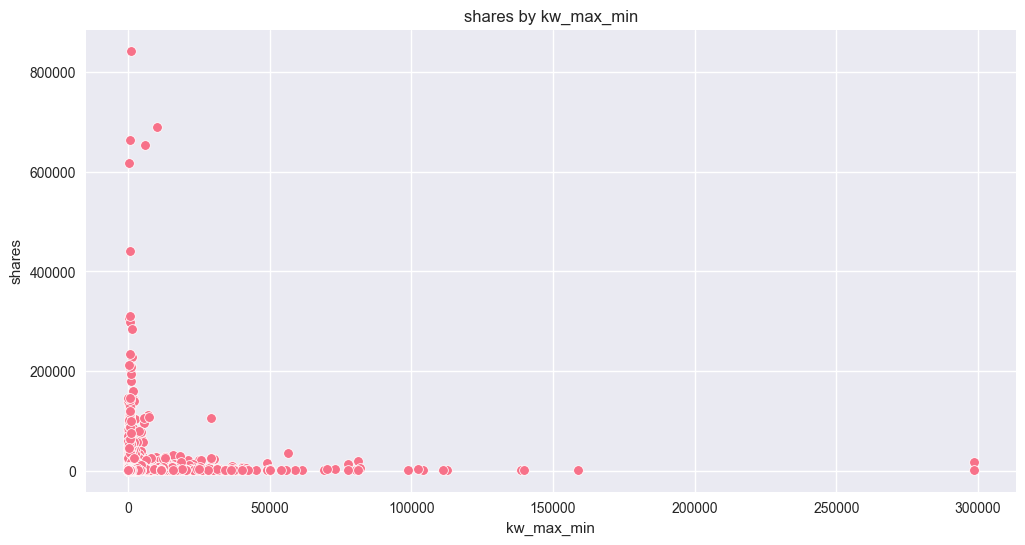

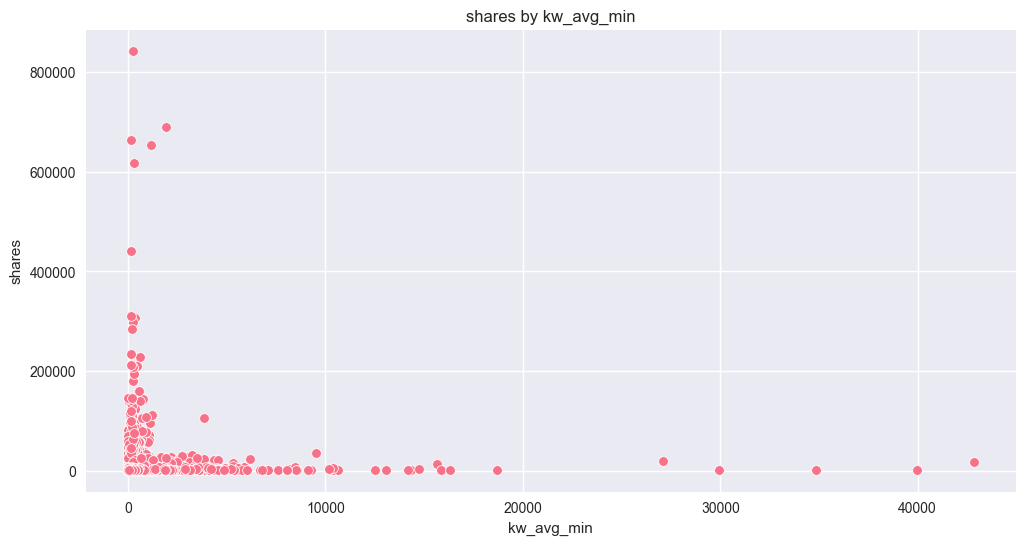

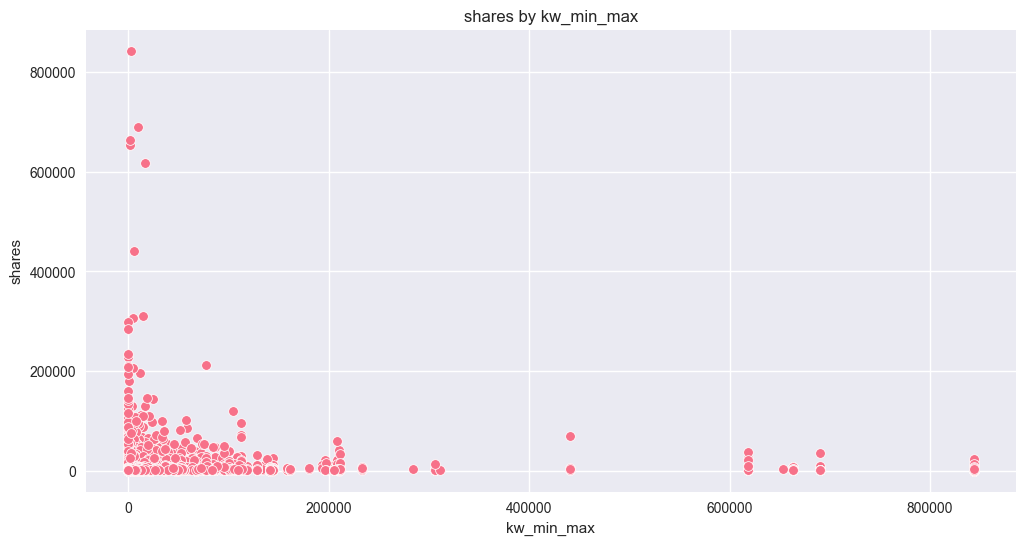

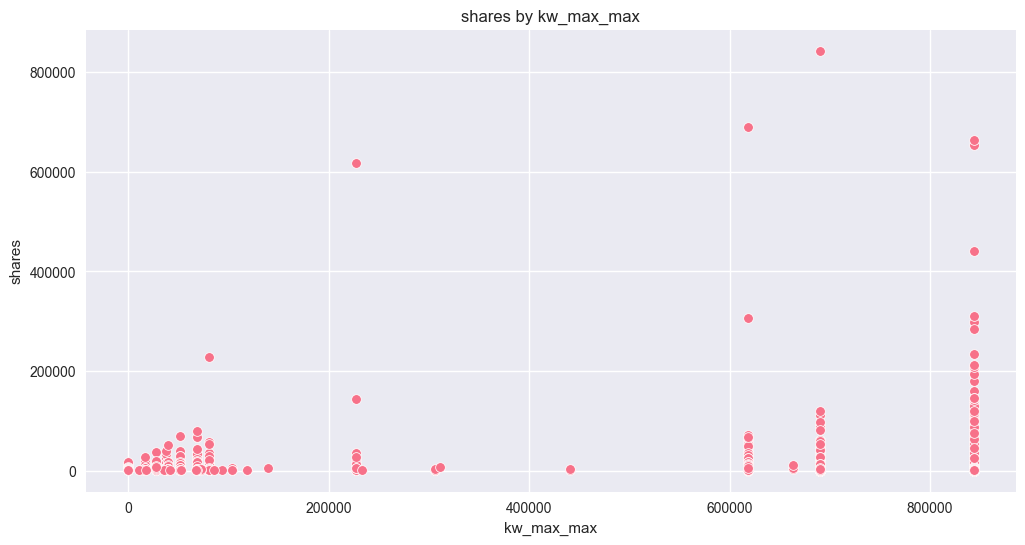

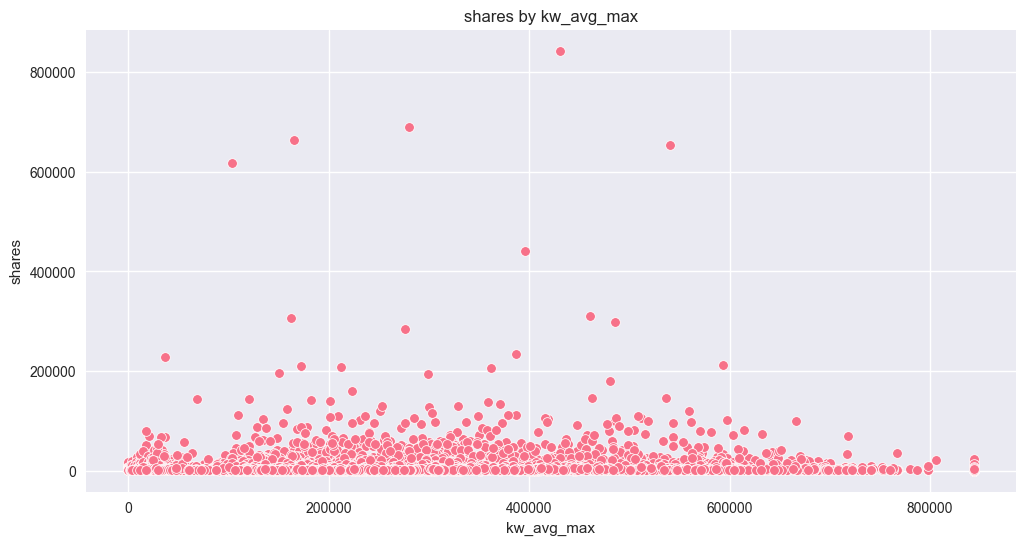

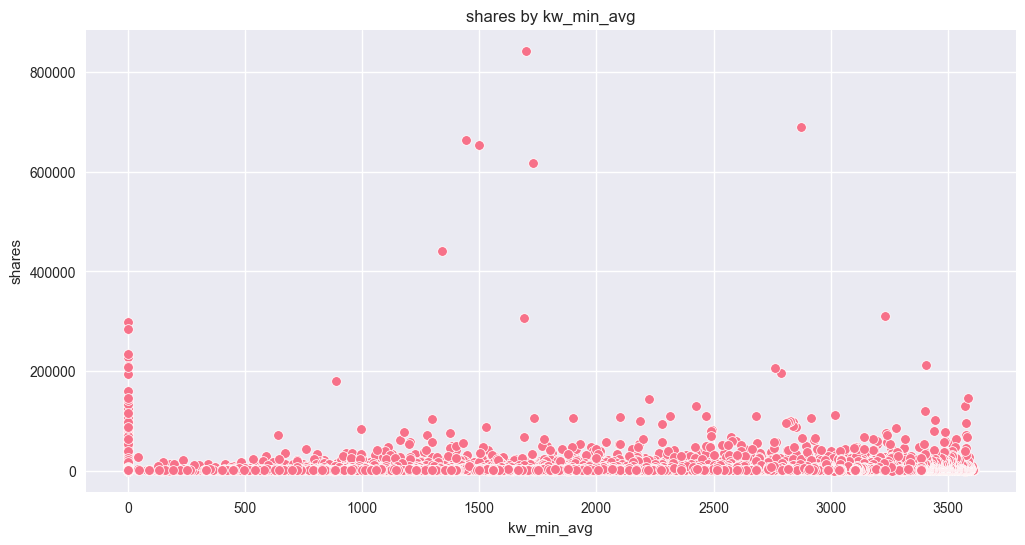

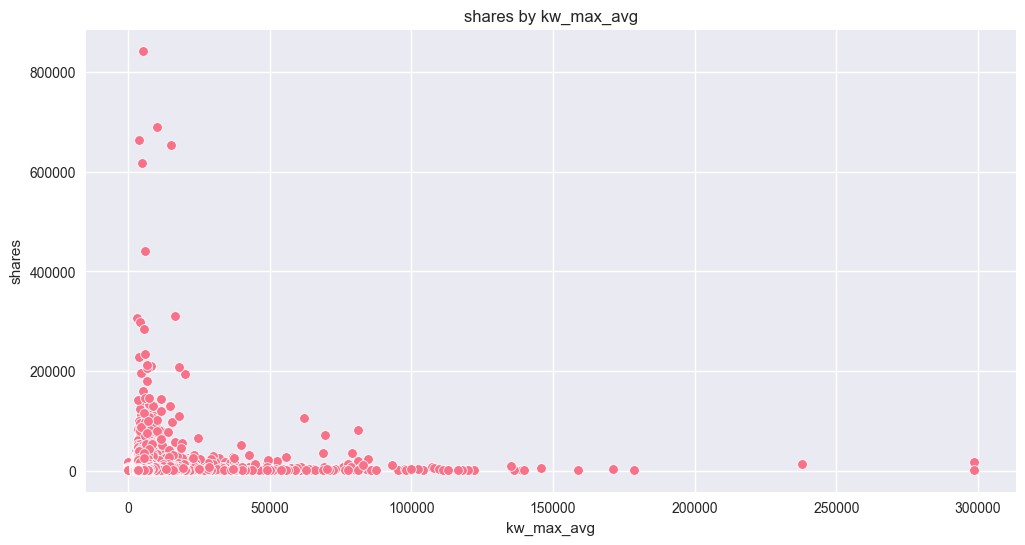

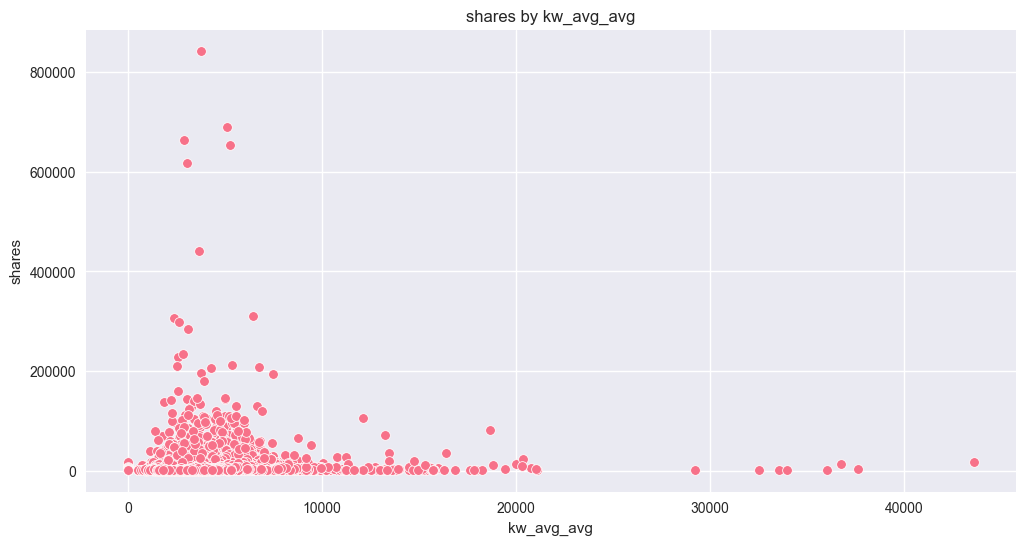

In [146]:
for feature in cont_features:
    e.scatter(df, feature, 'shares')

Weak/No Clear Correlation:

- timedelta: Wide spread, dense at low shares, no visible correlation. Outliers scattered, confirming low predictive power (likely low feature importance).
kw_avg_max, kw_min_avg: Evenly spread, weak correlation with shares. Outliers in kw_min_avg (1,200-1,750) suggest some viral articles, but no strong trend.


Following Frequency Distribution:

- n_tokens_title (8-13), n_tokens_content (<1,200), n_unique_tokens (0.4-0.8), n_non_stop_words (~1), n_non_stop_unique_tokens (0.5-0.9), num_keywords (5-10): Higher shares align with frequent ranges, with more outliers (e.g., 8-13 titles have viral potential). This suggests typical article characteristics (moderate length, keyword count) drive shares.
Right-skewed features (num_hrefs, num_self_hrefs, num_imgs, num_videos, self_reference_min_shares, self_reference_max_shares, self_reference_avg_shares, kw_max_min, kw_avg_min, kw_min_max, kw_max_avg, kw_avg_avg): Most shares cluster at low values, following their skewed distributions. Outliers (e.g., kw_min_min at 220) indicate rare high-share cases.


Non-Linear Patterns:

- n_comments: Triangular dispersion with an upward trend, but not linear/tight, suggesting engagement drives shares multifactorially (aligns with high importance: 0.503901).
kw_max_max: Both low and high values yield high shares, confirming non-linearity (left-skewed in univariate analysis).


Normally Distributed:

- average_token_length (4-6): Shares align with its normal distribution, suggesting no strong deviation for viral articles.


Key Takeaways:

- Features like n_comments, n_tokens_title, and n_tokens_content are promising predictors due to their alignment with high shares and outliers.
- Keyword features (kw_avg_avg, kw_max_min) show potential but non-linear relationships, ideal for tree-based models.
- Weakly correlated features (timedelta, kw_avg_max) may be deprioritized or need interaction terms.

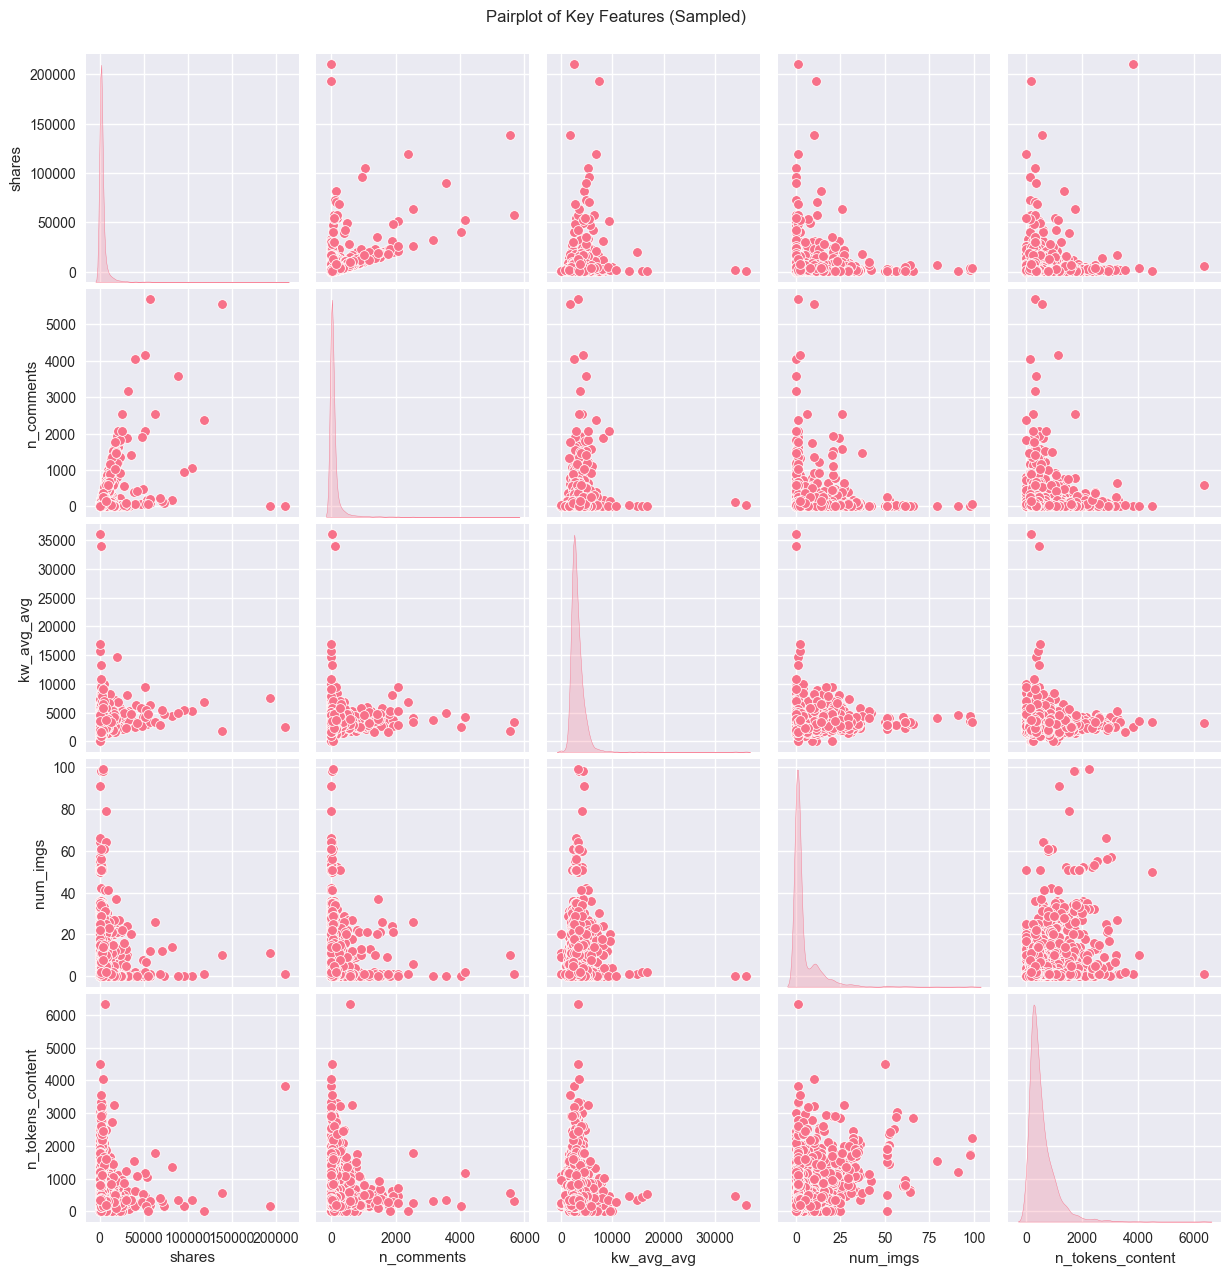

In [152]:
key_cols = ['shares', 'n_comments', 'kw_avg_avg', 'num_imgs', 'n_tokens_content']
df_sample = df[key_cols].sample(frac=0.1, random_state=42)
sns.pairplot(df_sample, diag_kind='kde')
plt.suptitle('Pairplot of Key Features (Sampled)', y=1.02)
plt.show()

## Correlation Analysis

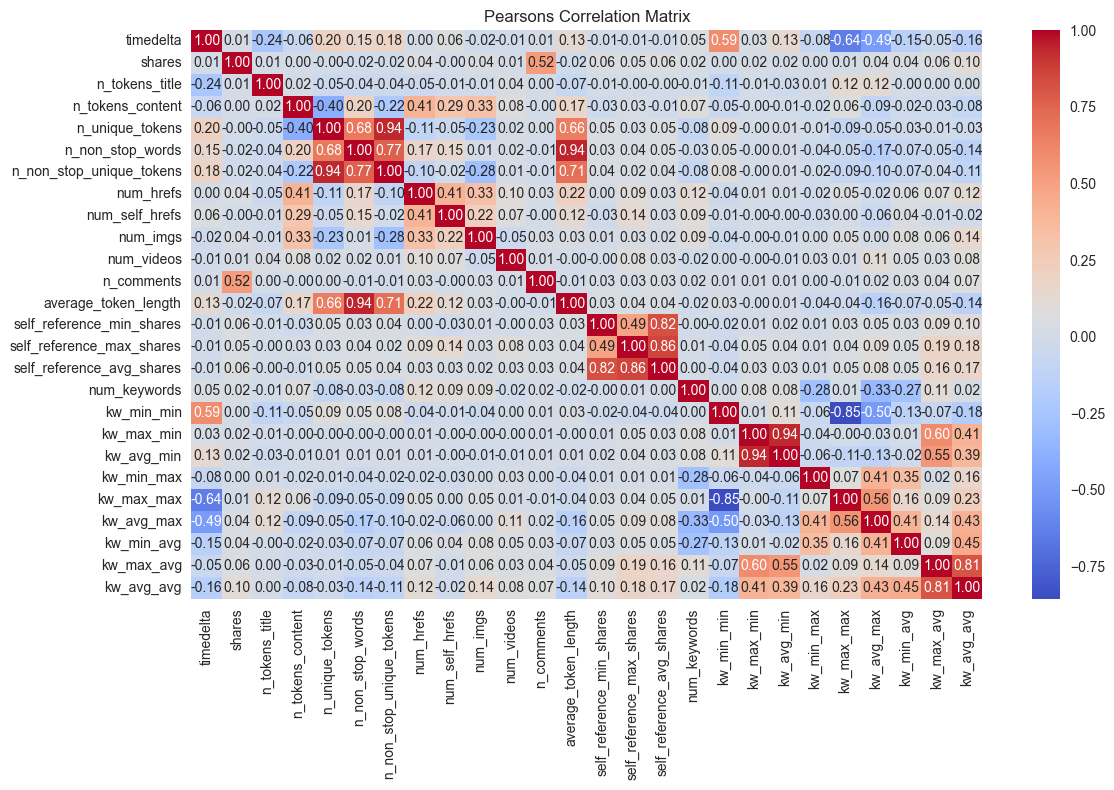

In [ ]:
e.pearson(df, cont_features)

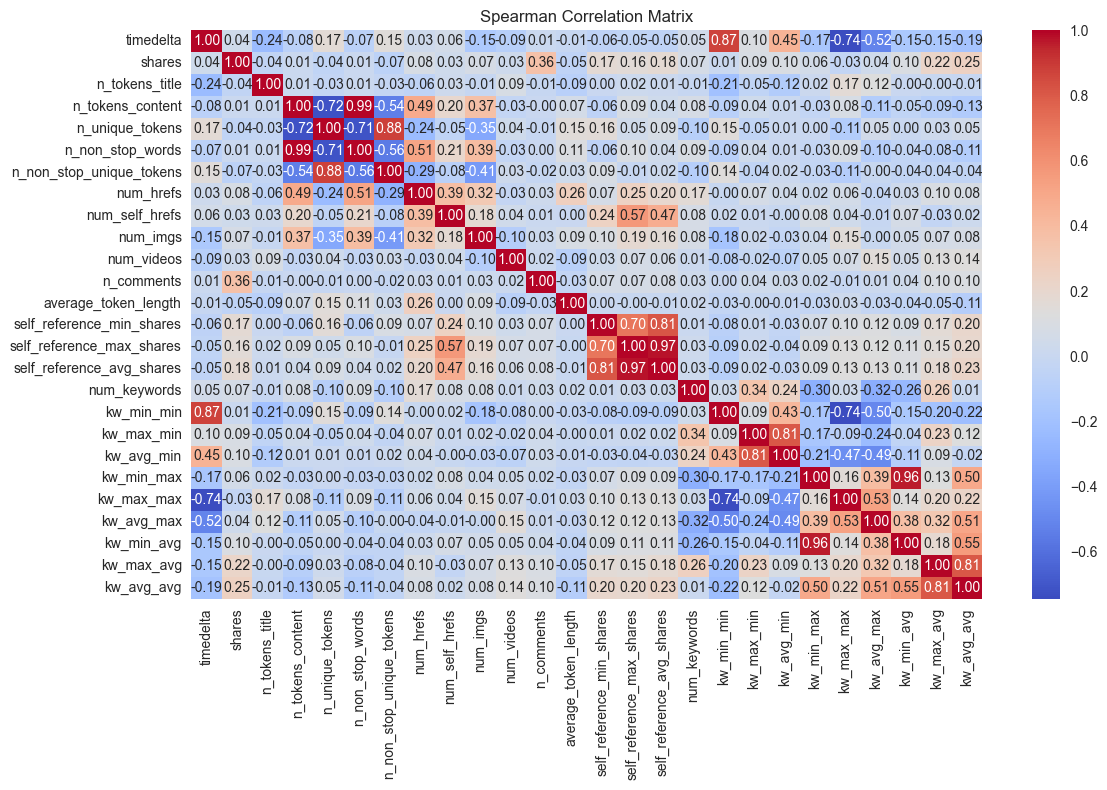

In [158]:
e.spearman(df, cont_features)

- For linear relationships, shares and n_comments have a positive correlation(0.52) with a weak correlation with kw_avg_avg(0.1) and very weak with other features(0.01-0.07)
- For monotonic relationships, shares and n_comments have a medium correlation(0.36) and a slightly weaker correlation with kw_max_avg, kw_avg_avg and self_reference_min/max/avg_shares(0.22, 0.25 & 0.17)

In [161]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['shares'])
y = df['shares']
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df.sort_values(by='MI Score', ascending=False, inplace=True)
print(mi_df)

                      Feature  MI Score
11                 n_comments  1.661517
5            n_non_stop_words  0.207025
22                 kw_max_max  0.149714
13               data_channel  0.068544
9                    num_imgs  0.052508
27          is_missing_videos  0.046501
18                 kw_min_min  0.042003
16  self_reference_avg_shares  0.040650
26                 kw_avg_avg  0.036765
25                 kw_max_avg  0.036442
14  self_reference_min_shares  0.035253
15  self_reference_max_shares  0.033519
1                     weekday  0.030806
24                 kw_min_avg  0.030226
0                   timedelta  0.027288
17               num_keywords  0.018277
2              n_tokens_title  0.017168
21                 kw_min_max  0.015867
8              num_self_hrefs  0.015056
23                 kw_avg_max  0.014156
7                   num_hrefs  0.012202
19                 kw_max_min  0.011437
20                 kw_avg_min  0.009182
4             n_unique_tokens  0.006645


## Feature Engineering

Create new features to capture compound interactions

In [167]:
# Create one-hot-encoded data_channel columns
data_channel_dummies = pd.get_dummies(df['data_channel'], prefix='data_channel')

# Create interaction terms: n_comments * each data_channel
for col in data_channel_dummies.columns:
    df[f'n_comments_{col}'] = df['n_comments'] * data_channel_dummies[col]

In [168]:
df['keyword_ratio'] = df['kw_avg_max'] / (df['kw_avg_min'] + 1)
df['time_comments'] = df['timedelta'] * df['n_comments'] 
df['comments_selfref_avg'] = df['n_comments'] * df['self_reference_avg_shares']
df['comments_non_stop_words'] = df['n_comments'] * df['n_non_stop_words']

In [169]:

df.columns

Index(['timedelta', 'weekday', 'shares', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'n_comments',
       'average_token_length', 'data_channel', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_shares',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'is_missing_videos', 'n_comments_data_channel_1',
       'n_comments_data_channel_2', 'n_comments_data_channel_3',
       'n_comments_data_channel_4', 'n_comments_data_channel_5',
       'n_comments_data_channel_6', 'n_comments_data_channel_7',
       'keyword_ratio', 'time_comments', 'comments_selfref_avg',
       'comments_non_stop_words'],
      dtype='object')

## Baseline Model Training

In [ ]:
# Split data
X, y = e.split_data(df, 'shares')
X_train, X_val, X_test, y_train, y_val, y_test = e.split_train(X, y)

In [176]:
# We'll use RobustScaler to handle potential outliers better and log transform to handle the skewed distributions
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

numerical_features = ['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'n_comments',
       'average_token_length', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_shares',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
         'n_comments_data_channel_1', 'n_comments_data_channel_2', 'n_comments_data_channel_3',
       'n_comments_data_channel_4', 'n_comments_data_channel_5',
       'n_comments_data_channel_6', 'n_comments_data_channel_7',
       'keyword_ratio', 'time_comments', 'comments_selfref_avg',
       'comments_non_stop_words']

# Create numerical transformer
numerical_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
    ('scaler', RobustScaler())           # RobustScaler
])

In [178]:
# Define nominal features to be one-hot encoded
from sklearn.preprocessing import OneHotEncoder

nominal_features = ['data_channel', 'weekday', 'is_missing_videos']

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [180]:
# Combine transformers into a ColumnTransformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough',
    n_jobs=-1)

We'll use linear, SVM, random forest, and XGboost regression models as our baseline

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models to train and evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1)
}


In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
e.train_baseline(models, preprocessor, X_train, X_val, y_train, y_val)

Linear Regression → MSE: 54737427.40, MAE: 3282.96, RMSE: 7398.47, RSE: 7393.93, R²: 0.09, R² SD: 0.0248
Support Vector Machine → MSE: 63580151.14, MAE: 2329.90, RMSE: 7973.72, RSE: 7752.85, R²: -0.06, R² SD: 0.0065
Random Forest → MSE: 48638542.66, MAE: 2423.15, RMSE: 6974.13, RSE: 6963.65, R²: 0.19, R² SD: 0.1186
XGBoost → MSE: 70267192.00, MAE: 2605.60, RMSE: 8382.55, RSE: 8376.64, R²: -0.17, R² SD: 0.0885


The metrics are very low so instead of hyperparameter tuning, let's clean up the data some more to try reducing noise and improving the baseline metrics

In [ ]:
# Let's drop some features with low importance/correlation and related features to reduce noise
features_to_drop = ['kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
                    'self_reference_min_shares', 'self_reference_max_shares', 'n_non_stop_unique_tokens',
                    'num_videos', 'average_token_length', 'num_hrefs', 'num_self_hrefs', 'n_tokens_title',
                    'kw_avg_min', 'n_unique_tokens', 'keyword_ratio', 'n_tokens_content']
df = df.drop(columns= features_to_drop)


Since predicting shares isn't as crucial as health data, let's remove extreme outliers at the 99th percentile for key features to improve RMSE & MSE by exluding rare viral cases so it's more predictable

In [196]:
for col in ['shares', 'n_comments']:
    p99 = np.percentile(df[col], 99)
    df[col] = df[col].clip(upper=p99)
    print(f"Capped {col} at 99th percentile: {p99}")

Capped shares at 99th percentile: 32000.0
Capped n_comments at 99th percentile: 1188.0


In [203]:
df.columns

Index(['timedelta', 'weekday', 'shares', 'n_non_stop_words', 'num_imgs',
       'n_comments', 'data_channel', 'self_reference_avg_shares',
       'num_keywords', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'is_missing_videos', 'n_comments_data_channel_1',
       'n_comments_data_channel_2', 'n_comments_data_channel_3',
       'n_comments_data_channel_4', 'n_comments_data_channel_5',
       'n_comments_data_channel_6', 'n_comments_data_channel_7',
       'time_comments', 'comments_selfref_avg', 'comments_non_stop_words'],
      dtype='object')

## Baseline Model Training(Post trimming features)

In [223]:
# Split data
X, y = e.split_data(df, 'shares')
X_train, X_val, X_test, y_train, y_val, y_test = e.split_train(X, y)
X

timedelta  weekday  n_non_stop_words  num_imgs  n_comments  \
0          731.0        1               1.0       1.0         0.0   
1          731.0        1               1.0       1.0        28.0   
2          731.0        1               1.0       1.0        15.0   
3          731.0        1               1.0       1.0        72.0   
4          731.0        1               1.0      20.0        20.0   
...          ...      ...               ...       ...         ...   
35675        8.0        3               1.0       1.0        72.0   
35676        8.0        3               1.0       1.0        72.0   
35677        8.0        3               1.0       3.0        76.0   
35678        8.0        3               1.0       1.0         0.0   
35679        8.0        3               1.0       0.0       130.0   

       data_channel  self_reference_avg_shares  num_keywords     kw_avg_max  \
0                 2                 496.000000           5.0       0.000000   
1                 3                   0.000000           4.0       0.000000   
2                 3                 918.000000           6.0       0.000000   
3                 2                   0.000000           7.0       0.000000   
4                 5                3151.157895           7.0       0.000000   
...             ...                        ...           ...            ...   
35675             3                3633.333333           6.0  484083.333333   
35676             5               37033.333333           8.0  374962.500000   
35677             4                2100.000000           7.0  192985.714286   
35678             6                 452.000000           5.0  254600.000000   
35679             2                2100.000000           4.0  366200.000000   

        kw_min_avg  ...  n_comments_data_channel_1  n_comments_data_channel_2  \
0         0.000000  ...                        0.0                        0.0   
1         0.000000  ...                        0.0                        0.0   
2         0.000000  ...                        0.0                        0.0   
3         0.000000  ...                        0.0                       72.0   
4         0.000000  ...                        0.0                        0.0   
...            ...  ...                        ...                        ...   
35675     0.000000  ...                        0.0                        0.0   
35676  2514.742857  ...                        0.0                        0.0   
35677  1664.267857  ...                        0.0                        0.0   
35678     0.000000  ...                        0.0                        0.0   
35679  3035.080555  ...                        0.0                      130.0   

       n_comments_data_channel_3  n_comments_data_channel_4  \
0                            0.0                        0.0   
1                           28.0                        0.0   
2                           15.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
35675                       72.0                        0.0   
35676                        0.0                        0.0   
35677                        0.0                       76.0   
35678                        0.0                        0.0   
35679                        0.0                        0.0   

       n_comments_data_channel_5  n_comments_data_channel_6  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                           20.0                        0.0   
...                          ...                        ...   
35675                        0.0                        0.

In [229]:
# Define numerical features again for the trimmed dataset
numerical_features = ['timedelta', 'n_non_stop_words', 'num_imgs',
       'n_comments', 'self_reference_avg_shares',
       'num_keywords', 'kw_avg_max', 'kw_min_avg', 
       'kw_max_avg', 'kw_avg_avg',  'n_comments_data_channel_1',
       'n_comments_data_channel_2', 'n_comments_data_channel_3',
       'n_comments_data_channel_4', 'n_comments_data_channel_5',
       'n_comments_data_channel_6', 'n_comments_data_channel_7',
       'time_comments', 'comments_selfref_avg', 'comments_non_stop_words']

# Create numerical transformer
numerical_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
    ('scaler', RobustScaler())           # RobustScaler
])

In [230]:
# Define nominal features for trimmed dataset

nominal_features = ['data_channel', 'weekday', 'is_missing_videos']

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [231]:
# Define preprocessor again for trimmed dataset

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough',
    n_jobs=-1)

In [232]:
# Define models to train and evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50, max_depth=7, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, max_depth=4, learning_rate=0.1, n_jobs=-1)
}

e.train_baseline(models, preprocessor, X_train, X_val, y_train, y_val)

Linear Regression → MSE: 16672073.72, MAE: 2367.30, RMSE: 4083.15, RSE: 4082.52, R²: 0.16, R² SD: 0.0194
Support Vector Machine → MSE: 22268127.34, MAE: 2017.29, RMSE: 4718.91, RSE: 4456.71, R²: -0.12, R² SD: 0.0024
Random Forest → MSE: 12340128.09, MAE: 1813.97, RMSE: 3512.85, RSE: 3512.40, R²: 0.38, R² SD: 0.0142
XGBoost → MSE: 12161589.00, MAE: 1776.93, RMSE: 3487.35, RSE: 3486.93, R²: 0.39, R² SD: 0.0172


The metrics have slightly improved with our trimmed features, let's try log transforming shares before considering whether to trim more features

In [241]:
# Define X & y again
X = df.drop(columns=['shares'])

# Log transform shares to reduce skewedness
y = np.log1p(df['shares'])
X_train, X_val, X_test, y_train, y_val, y_test = e.split_train(X, y)

In [237]:
e.train_baseline(models, preprocessor, X_train, X_val, y_train, y_val)

Linear Regression → MSE: 0.63, MAE: 0.61, RMSE: 0.80, RSE: 0.80, R²: 0.24, R² SD: 0.0103
Support Vector Machine → MSE: 0.87, MAE: 0.69, RMSE: 0.93, RSE: 0.91, R²: -0.05, R² SD: 0.0023
Random Forest → MSE: 0.50, MAE: 0.52, RMSE: 0.71, RSE: 0.71, R²: 0.40, R² SD: 0.0109
XGBoost → MSE: 0.48, MAE: 0.50, RMSE: 0.69, RSE: 0.69, R²: 0.42, R² SD: 0.0102


Metrics have improved slightly again, let's move on to hyperparameter tuning and drop SVM Regression since it's the poorest performing model

## Hyperparameter Tuning

In [242]:
from scipy.stats import uniform, randint

models_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'model__fit_intercept': [True, False]  # Whether to include intercept
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'model__n_estimators': randint(50, 200),  # Number of trees
            'model__max_depth': randint(5, 15),  # Depth of trees
            'model__min_samples_split': randint(2, 10),  # Minimum samples to split
            'model__min_samples_leaf': randint(1, 5)  # Minimum samples per leaf
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'model__n_estimators': randint(100, 300),  # Number of boosting rounds
            'model__max_depth': randint(3, 7),  # Depth of trees
            'model__learning_rate': uniform(0.01, 0.2),  # Learning rate
            'model__subsample': uniform(0.6, 0.4),  # Fraction of samples per tree
            'model__colsample_bytree': uniform(0.6, 0.4)  # Fraction of features per tree
        }
    }
}

In [244]:
results = e.tune_models_random(models_params, X_train, y_train, X_val, y_val, preprocessor, n_iter=20)

c:\Users\Admin\.conda\envs\news\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits

Linear Regression Tuning Results:
Best Parameters: {'model__fit_intercept': False}
Best CV R²: 0.2704
Validation MSE: 0.63, MAE: 0.61, RMSE: 0.80, RSE: 0.80, R²: 0.24
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Random Forest Tuning Results:
Best Parameters: {'model__max_depth': 14, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8, 'model__n_estimators': 124}
Best CV R²: 0.4372
Validation MSE: 0.48, MAE: 0.50, RMSE: 0.70, RSE: 0.70, R²: 0.42
Fitting 5 folds for each of 20 candidates, totalling 100 fits

XGBoost Tuning Results:
Best Parameters: {'model__colsample_bytree': np.float64(0.6923575302488596), 'model__learning_rate': np.float64(0.05820509320520235), 'model__max_depth': 6, 'model__n_estimators': 298, 'model__subsample': np.float64(0.8439986631130484)}
Best CV R²: 0.4495
Validation MSE: 0.47, MAE: 0.49, RMSE: 0.69, RSE: 0.69, R²: 0.43


Using the randomsearchCV parameters, we'll do a gridsearchCV to narrow it down

In [245]:
from sklearn.model_selection import GridSearchCV

models_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'model__fit_intercept': [True, False]  # Test both options
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {
            'model__n_estimators': [100, 124, 150],  # Around best (124)
            'model__max_depth': [12, 14, 16],  # Around best (14)
            'model__min_samples_split': [6, 8, 10],  # Around best (8)
            'model__min_samples_leaf': [2, 3, 4]  # Around best (3)
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'model__n_estimators': [250, 298, 350],  # Around best (298)
            'model__max_depth': [5, 6, 7],  # Around best (6)
            'model__learning_rate': [0.05, 0.058, 0.07],  # Around best (0.058)
            'model__subsample': [0.8, 0.844, 0.9],  # Around best (0.844)
            'model__colsample_bytree': [0.65, 0.692, 0.75]  # Around best (0.692)
        }
    }
}

In [247]:
results = {}

# Iterate over models and parameter grids
for name, mp in models_params.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', mp['model'])])
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        mp['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Extract best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Predict on validation set
    y_val_pred = best_model.predict(X_val)
    
    # Calculate validation metrics
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    residuals = y_val - y_val_pred
    rse = np.std(residuals)
    r2 = r2_score(y_val, y_val_pred)
    mae_orig = mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred))  # Original scale
    
    # Store results
    results[name] = {
        'best_model': best_model,
        'best_params': best_params,
        'best_cv_score': best_score,
        'val_mse': mse,
        'val_mae': mae,
        'val_rmse': rmse,
        'val_rse': rse,
        'val_r2': r2,
        'val_mae_orig': mae_orig
    }
    
    # Print results
    print(f"\n{name} Tuning Results (GridSearchCV):")
    print(f"Best Parameters: {best_params}")
    print(f"Best CV R²: {best_score:.4f}")
    print(f"Validation MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, RSE: {rse:.2f}, R²: {r2:.2f}")
    print(f"Validation MAE (original scale): {mae_orig:.2f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Linear Regression Tuning Results (GridSearchCV):
Best Parameters: {'model__fit_intercept': False}
Best CV R²: 0.2704
Validation MSE: 0.63, MAE: 0.61, RMSE: 0.80, RSE: 0.80, R²: 0.24
Validation MAE (original scale): 1851.67
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Random Forest Tuning Results (GridSearchCV):
Best Parameters: {'model__max_depth': 16, 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 150}
Best CV R²: 0.4383
Validation MSE: 0.48, MAE: 0.50, RMSE: 0.70, RSE: 0.70, R²: 0.42
Validation MAE (original scale): 1495.38
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

XGBoost Tuning Results (GridSearchCV):
Best Parameters: {'model__colsample_bytree': 0.65, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 250, 'model__subsample': 0.844}
Best CV R²: 0.4518
Validation MSE: 0.47, MAE: 0.49, RMSE: 0.69, RSE: 0.69, R²: 0.43
Vali

Evaluate best model on test set

In [248]:
# Combine training and validation sets for final training
X_train_full = pd.concat([X_train, X_val], axis=0)
y_train_full = pd.concat([y_train, y_val], axis=0)

# Define the best XGBoost model with tuned parameters
best_params = {
    'colsample_bytree': 0.65,
    'learning_rate': 0.05,
    'max_depth': 6,
    'n_estimators': 250,
    'subsample': 0.844
}

# Create pipeline with preprocessor and XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1, **best_params))
])

# Fit the model on the combined training + validation set
pipeline.fit(X_train_full, y_train_full)

# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate test set metrics (log scale)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
residuals = y_test - y_test_pred
rse = np.std(residuals)
r2 = r2_score(y_test, y_test_pred)

# Calculate MAE on original scale
mae_orig = mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))

# Print results
print("\nXGBoost Test Set Results (Best Parameters):")
print(f"Parameters: {best_params}")
print(f"Test MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, RSE: {rse:.2f}, R²: {r2:.2f}")
print(f"Test MAE (original scale): {mae_orig:.2f}")


XGBoost Test Set Results (Best Parameters):
Parameters: {'colsample_bytree': 0.65, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 250, 'subsample': 0.844}
Test MSE: 0.44, MAE: 0.47, RMSE: 0.67, RSE: 0.67, R²: 0.46
Test MAE (original scale): 1454.76


- R² = 0.46: Indicates the model explains ~46% of the variance in log-transformed shares, which is strong for a noisy, skewed target like shares (mean 3,379, max 663,600). This improves over validation (R² 0.43) and Random Forest (R² 0.42), suggesting good generalization.
- MAE = 0.47 (log scale): Average prediction error in log space, slightly better than validation (0.49)
- MAE (original scale) = 1454.76: Better than prior XGBoost (1777) and Random Forest (1495.), indicating the model would work equally well on real-world/unseen data.
- MSE (0.44), RMSE (0.67), RSE (0.67): Consistent with R², showing low error variance in log space.